In [2]:
import requests
import seaborn as sns
import plotly.express as px
import pycountry as pc
import json
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from pyjstat import pyjstat
import numpy as np
import plotly.graph_objects as go

In [3]:
def get_eurostat_data(article_title, *args):
    '''
    To Do:
        - Write *args
        - Write _url_builder() helper func.
    '''
    
    article_title = article_title.upper()
    url = f'https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/{article_title}?format=JSON&lang=EN'

    output = pyjstat.Dataset.read(url)
    df = output.write('dataframe')

    return df

In [4]:
crime = get_eurostat_data('crim_off_cat')

In [5]:
# Lineplot - cases per nation over time
fig = px.bar(crime, x='Time', y='value', color='Geopolitical entity (reporting)',
              title='Intentional Homicide Cases by Country (2008-2012)')
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Cases',
    legend_title='Country',
    template='plotly_white',
    width=1000,  # Set the width of the plot
    height=600,  # Set the height of the plot
    margin=dict(l=50, r=50, t=100, b=50)
)
fig.show()

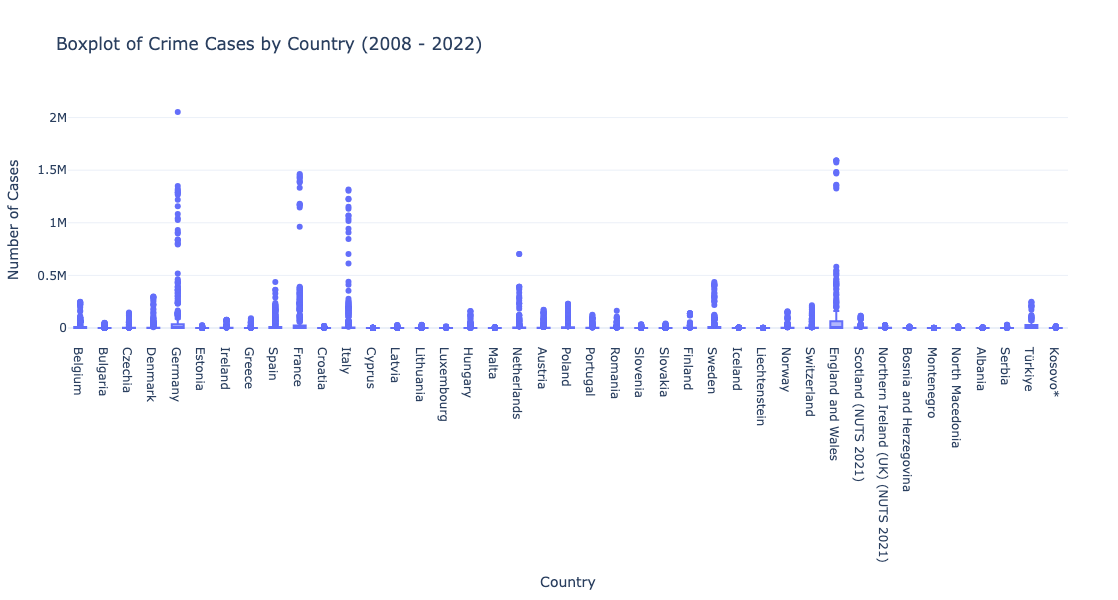

In [7]:
# Create a box plot using Plotly
fig_box = px.box(crime, x='Geopolitical entity (reporting)', y='value',
                 title=f'Boxplot of Crime Cases by Country ({crime['Time'].min()} - {crime['Time'].max()})')

fig_box.update_layout(
    xaxis_title='Country',
    yaxis_title='Number of Cases',
    template='plotly_white',
    width=900,  # Set the width of the plot
    height=600,  # Set the height of the plot
    margin=dict(l=50, r=50, t=100, b=50)  # Add margins to prevent squishing
)

fig_box.show()

In [6]:
happiness = get_eurostat_data('ilc_pw08')
happiness = happiness.drop(happiness[happiness.Frequency == 'Unknown'].index)

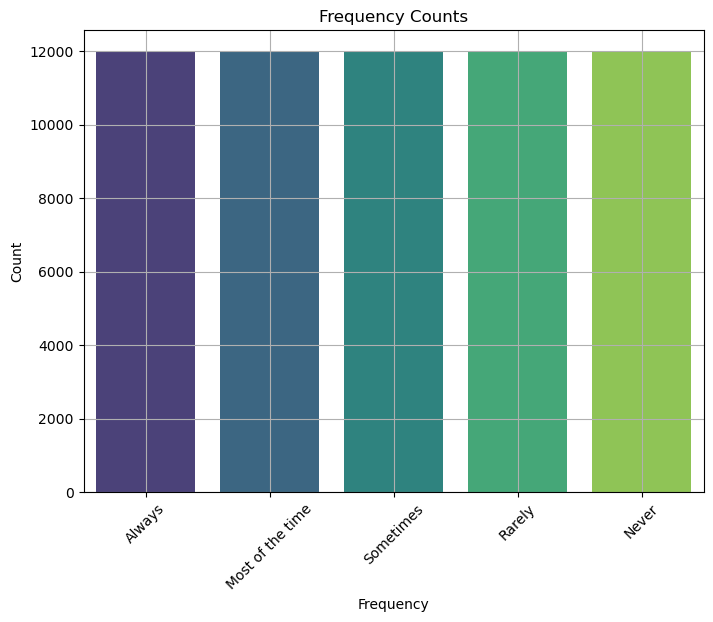

In [7]:
# Plot the frequency column values
plt.figure(figsize=(8, 6))
sns.countplot(x='Frequency', data=happiness, palette='viridis', hue='Frequency')
plt.title('Frequency Counts')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [8]:
train_system = get_eurostat_data('ttr00015')

In [9]:
leisure = get_eurostat_data('ilc_scp01')

In [10]:
social_exclusion = get_eurostat_data('ilc_peps01n')

In [11]:
pop_demo = get_eurostat_data('demo_pjangroup')
pop_demo = pop_demo.drop(pop_demo[pop_demo.value == 0.0].index)
pop_demo = pop_demo.dropna()

In [12]:
cost_of_living = get_eurostat_data('ilc_mded04')

In [13]:
cost_of_living.dtypes

Time frequency                                                    object
Type of household                                                 object
Income situation in relation to the risk of poverty threshold     object
Affordability                                                     object
Unit of measure                                                   object
Geopolitical entity (reporting)                                   object
Time                                                              object
value                                                            float64
dtype: object

# FORMAL DATA CLEANING

#### DATASETS
- HAPPINESS
- CRIME
- TRAIN_SYSTEM
- LEISURE
- SOCIAL_EXCLUSION
- POP_DEMO
- COST_OF_LIVING

In [14]:
eu_nations = [
    'austria',
    'belgium',
    'bulgaria',
    'croatia',
    'cyprus',
    'czechia',
    'denmark',
    'estonia',
    'finland',
    'france',
    'germany',
    'greece',
    'hungary',
    'ireland',
    'italy',
    'latvia',
    'lithuania',
    'luxembourg',
    'malta',
    'netherlands',
    'poland',
    'portugal',
    'romania',
    'slovakia',
    'spain',
    'sweden',
    'slovenia'
]

eu_nations = [nation.upper() for nation in eu_nations]

### Happiness Index Cleaning

In [15]:
happiness['Geopolitical entity (reporting)'].unique()

array(['European Union - 27 countries (from 2020)', 'Belgium', 'Bulgaria',
       'Czechia', 'Denmark', 'Germany', 'Estonia', 'Ireland', 'Greece',
       'Spain', 'France', 'Croatia', 'Italy', 'Cyprus', 'Latvia',
       'Lithuania', 'Luxembourg', 'Hungary', 'Malta', 'Netherlands',
       'Austria', 'Poland', 'Portugal', 'Romania', 'Slovenia', 'Slovakia',
       'Finland', 'Sweden', 'Iceland', 'Norway', 'Switzerland',
       'United Kingdom', 'Montenegro', 'North Macedonia', 'Albania',
       'Serbia', 'Türkiye', 'Kosovo*'], dtype=object)

In [16]:
happiness.dropna(inplace=True)

happiness['Geopolitical entity (reporting)'] = happiness['Geopolitical entity (reporting)'].str.upper()
happiness = happiness[happiness['Geopolitical entity (reporting)'].isin(eu_nations)]

In [17]:
happiness['Time'] = happiness['Time'].astype(int)

In [18]:
from collections import Counter
count = Counter(happiness['International Standard Classification of Education (ISCED 2011)'])
count

Counter({'All ISCED 2011 levels': 8400,
         'Upper secondary and post-secondary non-tertiary education (levels 3 and 4)': 8380,
         'Less than primary, primary and lower secondary education (levels 0-2)': 8275,
         'Tertiary education (levels 5-8)': 8090,
         "Short-cycle tertiary education and Bachelor's or equivalent level (levels 5 and 6)": 510})

In [19]:
happiness_ohe_cols = ['International Standard Classification of Education (ISCED 2011)', 'Frequency', 'Sex', 'Age class', 'Geopolitical entity (reporting)']
happiness_ohe = pd.get_dummies(happiness, columns=happiness_ohe_cols, dtype=int)

In [20]:
happiness_ohe.dtypes

Time frequency                                                                                                                                         object
Unit of measure                                                                                                                                        object
Time                                                                                                                                                    int64
value                                                                                                                                                 float64
International Standard Classification of Education (ISCED 2011)_All ISCED 2011 levels                                                                   int64
International Standard Classification of Education (ISCED 2011)_Less than primary, primary and lower secondary education (levels 0-2)                   int64
International Standard Classification of Education (

In [21]:
happiness_ohe

Time frequency Unit of measure  Time  value  \
3             Annual      Percentage  2013   16.7   
4             Annual      Percentage  2018   18.7   
5             Annual      Percentage  2022   19.6   
6             Annual      Percentage  2013   10.1   
7             Annual      Percentage  2018   13.6   
...              ...             ...   ...    ...   
69279         Annual      Percentage  2013    2.8   
69333         Annual      Percentage  2013    0.0   
69348         Annual      Percentage  2013    7.5   
69363         Annual      Percentage  2013    4.0   
69393         Annual      Percentage  2013    5.1   

       International Standard Classification of Education (ISCED 2011)_All ISCED 2011 levels  \
3                                                      1                                       
4                                                      1                                       
5                                                      1                                       
6                                                      1                                       
7                                                      1                                       
...                                                  ...                                       
69279                                                  0                                       
69333                                                  0                                       
69348                                                  0                                       
69363                                                  0                                       
69393                                                  0                                       

       International Standard Classification of Education (ISCED 2011)_Less than primary, primary and lower secondary education (levels 0-2)  \
3                                                      0                                                                                       
4                                                      0                                                                                       
5                                                      0                                                                                       
6                                                      0                                                                                       
7                                                      0                                                                                       
...                                                  ...                                                                                       
69279                                                  0                                                                                       
69333                                                  0                                                                                       
69348                                                  0                                                                                       
69363                                                  0                                                                                       
69393                                                  0                                                                                       

       International Standard Classification of Education (ISCED 2011)_Short-cycle tertiary education and Bachelor's or equivalent level (levels 5 and 6)  \
3                                                      0                                                                                                    
4                                                      0                                                                                                    
5               

### Crime Cleaning

In [22]:
crime.dropna(inplace=True)

In [23]:
crime.dtypes

Time frequency                                                            object
International classification of crime for statistical purposes (ICCS)     object
Unit of measure                                                           object
Geopolitical entity (reporting)                                           object
Time                                                                      object
value                                                                    float64
dtype: object

In [24]:
crime['Time'] = crime['Time'].astype(int)

In [25]:
crime['Geopolitical entity (reporting)'].unique()
nat_count = Counter(crime['Geopolitical entity (reporting)'])
nat_count

Counter({'Austria': 500,
         'Finland': 500,
         'Czechia': 498,
         'Spain': 498,
         'Greece': 496,
         'Croatia': 496,
         'Germany': 494,
         'Bulgaria': 492,
         'Belgium': 490,
         'Lithuania': 490,
         'Romania': 490,
         'Slovenia': 490,
         'Malta': 486,
         'Serbia': 474,
         'Switzerland': 470,
         'Slovakia': 468,
         'France': 464,
         'Cyprus': 460,
         'Poland': 460,
         'Latvia': 456,
         'Sweden': 456,
         'Portugal': 454,
         'Albania': 453,
         'Estonia': 450,
         'Denmark': 442,
         'Montenegro': 440,
         'Ireland': 430,
         'Luxembourg': 422,
         'Italy': 414,
         'Hungary': 414,
         'Netherlands': 414,
         'Norway': 396,
         'Liechtenstein': 380,
         'Iceland': 370,
         'Kosovo*': 353,
         'Scotland (NUTS 2021)': 286,
         'Northern Ireland (UK) (NUTS 2021)': 282,
         'North Macedoni

In [26]:
crime['Geopolitical entity (reporting)'] = crime['Geopolitical entity (reporting)'].str.upper()
crime = crime[crime['Geopolitical entity (reporting)'].isin(eu_nations)]

In [27]:
crime_ohe_cols = ['International classification of crime for statistical purposes (ICCS)', 'Geopolitical entity (reporting)']
crime_ohe = pd.get_dummies(crime, columns=crime_ohe_cols, dtype=int)

In [28]:
crime = crime.drop(crime[crime['Unit of measure'] == 'Number'].index)

In [29]:
crime.dtypes

Time frequency                                                            object
International classification of crime for statistical purposes (ICCS)     object
Unit of measure                                                           object
Geopolitical entity (reporting)                                           object
Time                                                                       int64
value                                                                    float64
dtype: object

### Train System cleaning

In [30]:
train_system['Geopolitical entity (reporting)'].unique()

array(['European Union - 27 countries (from 2020)',
       'Euro area – 20 countries (from 2023)',
       'Euro area - 19 countries  (2015-2022)', 'Belgium', 'Bulgaria',
       'Czechia', 'Denmark', 'Germany', 'Estonia', 'Ireland', 'Greece',
       'Spain', 'France', 'Croatia', 'Italy', 'Cyprus', 'Latvia',
       'Lithuania', 'Luxembourg', 'Hungary', 'Malta', 'Netherlands',
       'Austria', 'Poland', 'Portugal', 'Romania', 'Slovenia', 'Slovakia',
       'Finland', 'Sweden', 'Iceland', 'Liechtenstein', 'Norway',
       'Switzerland', 'United Kingdom', 'Montenegro', 'North Macedonia',
       'Albania', 'Serbia', 'Türkiye'], dtype=object)

In [31]:
train_system.dtypes

Time frequency                      object
Unit of measure                     object
Transport coverage                  object
Geopolitical entity (reporting)     object
Time                                object
value                              float64
dtype: object

In [32]:
train_system['Time'] = train_system['Time'].astype(int)

In [33]:
train_system.dropna()

Time frequency                   Unit of measure Transport coverage  \
3           Annual  Millions of passenger-kilometres    Total transport   
4           Annual  Millions of passenger-kilometres    Total transport   
5           Annual  Millions of passenger-kilometres    Total transport   
6           Annual  Millions of passenger-kilometres    Total transport   
7           Annual  Millions of passenger-kilometres    Total transport   
..             ...                               ...                ...   
475         Annual  Millions of passenger-kilometres    Total transport   
476         Annual  Millions of passenger-kilometres    Total transport   
477         Annual  Millions of passenger-kilometres    Total transport   
478         Annual  Millions of passenger-kilometres    Total transport   
479         Annual  Millions of passenger-kilometres    Total transport   

               Geopolitical entity (reporting)  Time     value  
3    European Union - 27 countries (from 2020)  2015  375713.0  
4    European Union - 27 countries (from 2020)  2016  384335.0  
5    European Union - 27 countries (from 2020)  2017  394142.0  
6    European Union - 27 countries (from 2020)  2018  400427.0  
7    European Union - 27 countries (from 2020)  2019  413923.0  
..                                         ...   ...       ...  
475                                    Türkiye  2019    4912.0  
476                                    Türkiye  2020    1520.0  
477                                    Türkiye  2021    2251.0  
478                                    Türkiye  2022    5922.0  
479                                    Türkiye  2023    6245.0  

[311 rows x 6 columns]

In [34]:
train_system['Geopolitical entity (reporting)'] = train_system['Geopolitical entity (reporting)'].str.upper()
train_system = train_system[train_system['Geopolitical entity (reporting)'].isin(eu_nations)]

In [35]:
trains_ohe_cols = ['Geopolitical entity (reporting)']
train_system_ohe = pd.get_dummies(train_system, columns=trains_ohe_cols, dtype=int)
train_system_ohe

Time frequency                   Unit of measure Transport coverage  Time  \
36          Annual  Millions of passenger-kilometres    Total transport  2012   
37          Annual  Millions of passenger-kilometres    Total transport  2013   
38          Annual  Millions of passenger-kilometres    Total transport  2014   
39          Annual  Millions of passenger-kilometres    Total transport  2015   
40          Annual  Millions of passenger-kilometres    Total transport  2016   
..             ...                               ...                ...   ...   
355         Annual  Millions of passenger-kilometres    Total transport  2019   
356         Annual  Millions of passenger-kilometres    Total transport  2020   
357         Annual  Millions of passenger-kilometres    Total transport  2021   
358         Annual  Millions of passenger-kilometres    Total transport  2022   
359         Annual  Millions of passenger-kilometres    Total transport  2023   

       value  Geopolitical entity (reporting)_AUSTRIA  \
36       NaN                                        0   
37       NaN                                        0   
38       NaN                                        0   
39       NaN                                        0   
40       NaN                                        0   
..       ...                                      ...   
355  14617.0                                        0   
356   8129.0                                        0   
357   8027.0                                        0   
358  12879.0                                        0   
359      NaN                                        0   

     Geopolitical entity (reporting)_BELGIUM  \
36                                         1   
37                                         1   
38                                         1   
39                                         1   
40                                         1   
..                                       ...   
355                                        0   
356                                        0   
357                                        0   
358                                        0   
359                                        0   

     Geopolitical entity (reporting)_BULGARIA  \
36                                          0   
37                                          0   
38                                          0   
39                                          0   
40                                          0   
..                                        ...   
355                                         0   
356                                         0   
357                                         0   
358                                         0   
359                                         0   

     Geopolitical entity (reporting)_CROATIA  \
36                                         0   
37                                         0   
38                                         0   
39                                         0   
40                                         0   
..                                       ...   
355                                        0   
356                                        0   
357                                        0   
358                                        0   
359                                        0   

     Geopolitical entity (reporting)_CYPRUS  ...  \
36                                        0  ...   
37                                        0  ...   
38                                        0  ...   
39                                        0  ...   
40                                        0  ...   
..                                      ...  ...   
355                                       0  ...   
356                                       0  ...   
357                                       0  ...   
358                                       0  ...   
359                            

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
crime['norm_val'] = scaler.fit_transform(crime[['value']])
crime

Time frequency  \
615           Annual   
616           Annual   
617           Annual   
618           Annual   
619           Annual   
...              ...   
25600         Annual   
25601         Annual   
25602         Annual   
25603         Annual   
25604         Annual   

      International classification of crime for statistical purposes (ICCS)  \
615                                 Intentional homicide                      
616                                 Intentional homicide                      
617                                 Intentional homicide                      
618                                 Intentional homicide                      
619                                 Intentional homicide                      
...                                                  ...                      
25600       Participation in an organized criminal group                      
25601       Participation in an organized criminal group                      
25602       Participation in an organized criminal group                      
25603       Participation in an organized criminal group                      
25604       Participation in an organized criminal group                      

                        Unit of measure Geopolitical entity (reporting)  Time  \
615    Per hundred thousand inhabitants                         BELGIUM  2008   
616    Per hundred thousand inhabitants                         BELGIUM  2009   
617    Per hundred thousand inhabitants                         BELGIUM  2010   
618    Per hundred thousand inhabitants                         BELGIUM  2011   
619    Per hundred thousand inhabitants                         BELGIUM  2012   
...                                 ...                             ...   ...   
25600  Per hundred thousand inhabitants                         FINLAND  2018   
25601  Per hundred thousand inhabitants                         FINLAND  2019   
25602  Per hundred thousand inhabitants                         FINLAND  2020   
25603  Per hundred thousand inhabitants                         FINLAND  2021   
25604  Per hundred thousand inhabitants                         FINLAND  2022   

       value  norm_val  
615     1.91  0.000350  
616     1.76  0.000323  
617     1.74  0.000319  
618     1.95  0.000358  
619     1.86  0.000341  
...      ...       ...  
25600   0.02  0.000004  
25601   0.04  0.000007  
25602   0.05  0.000009  
25603   0.05  0.000009  
25604   0.05  0.000009  

[6312 rows x 7 columns]

In [37]:
crime['International classification of crime for statistical purposes (ICCS)'].unique()

array(['Intentional homicide', 'Attempted intentional homicide',
       'Serious assault', 'Kidnapping', 'Sexual violence', 'Rape',
       'Sexual assault', 'Sexual exploitation', 'Child pornography',
       'Robbery', 'Burglary', 'Burglary of private residential premises',
       'Theft', 'Theft of a motorized vehicle or parts thereof',
       'Unlawful acts involving controlled drugs or precursors', 'Fraud',
       'Corruption', 'Bribery', 'Money laundering',
       'Acts against computer systems',
       'Participation in an organized criminal group'], dtype=object)

In [40]:
# Unique crime types
crime_types = crime['International classification of crime for statistical purposes (ICCS)'].unique()

# Iterate over each crime type and create a box plot
for crime_type in crime_types:
    crime_data = crime[crime['International classification of crime for statistical purposes (ICCS)'] == crime_type]
    fig_box = px.box(crime_data, x='Geopolitical entity (reporting)', y='norm_val',
                     title=f'Boxplot of {crime_type} by Country ({crime["Time"].min()} - {crime["Time"].max()})')

    fig_box.update_layout(
        xaxis_title='Country',
        yaxis_title='Number of Cases (Scaled)',
        template='plotly_white',
        width=900,  # Set the width of the plot
        height=600,  # Set the height of the plot
        margin=dict(l=50, r=50, t=100, b=50)  # Add margins to prevent squishing
    )

    fig_box.update_xaxes(tickangle=90)

    # Show the figure
    fig_box.show()

In [41]:
# Unique crime types
crime_types = crime['International classification of crime for statistical purposes (ICCS)'].unique()

# Iterate over each crime type and create a line plot
for crime_type in crime_types:
    crime_data = crime[crime['International classification of crime for statistical purposes (ICCS)'] == crime_type]
    fig_box = px.line(crime_data, x='Time', y='norm_val',
                     title=f'Lineplot of {crime_type} by Country ({crime["Time"].min()} - {crime["Time"].max()})', 
                      color='Geopolitical entity (reporting)')

    fig_box.update_layout(
        xaxis_title='Year',
        yaxis_title='Number of Cases (Scaled)',
        template='plotly_white',
        width=900,  # Set the width of the plot
        height=600,  # Set the height of the plot
        margin=dict(l=50, r=50, t=100, b=50)  # Add margins to prevent squishing
    )

    fig_box.update_xaxes(tickangle=90)

    # Show the figure
    fig_box.show()

In [42]:
# Unique crime types
crime_types = crime['International classification of crime for statistical purposes (ICCS)'].unique()

# Iterate over each crime type and create a line plot
for crime_type in crime_types:
    crime_data = crime[crime['International classification of crime for statistical purposes (ICCS)'] == crime_type]
    fig_box = px.bar(crime_data, x='Time', y='norm_val',
                     title=f'Barplot of {crime_type} by Country ({crime["Time"].min()} - {crime["Time"].max()})', 
                      color='Geopolitical entity (reporting)')

    fig_box.update_layout(
        xaxis_title='Year',
        yaxis_title='Number of Cases (Scaled)',
        template='plotly_white',
        width=900,  # Set the width of the plot
        height=600,  # Set the height of the plot
        margin=dict(l=50, r=50, t=100, b=50)  # Add margins to prevent squishing
    )

    fig_box.update_xaxes(tickangle=90)

    # Show the figure
    fig_box.show()

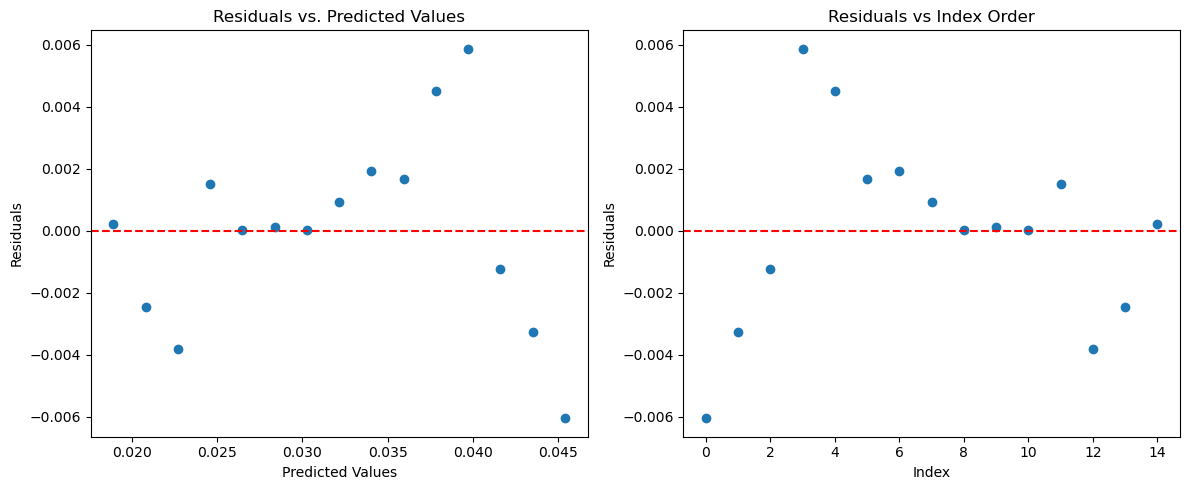

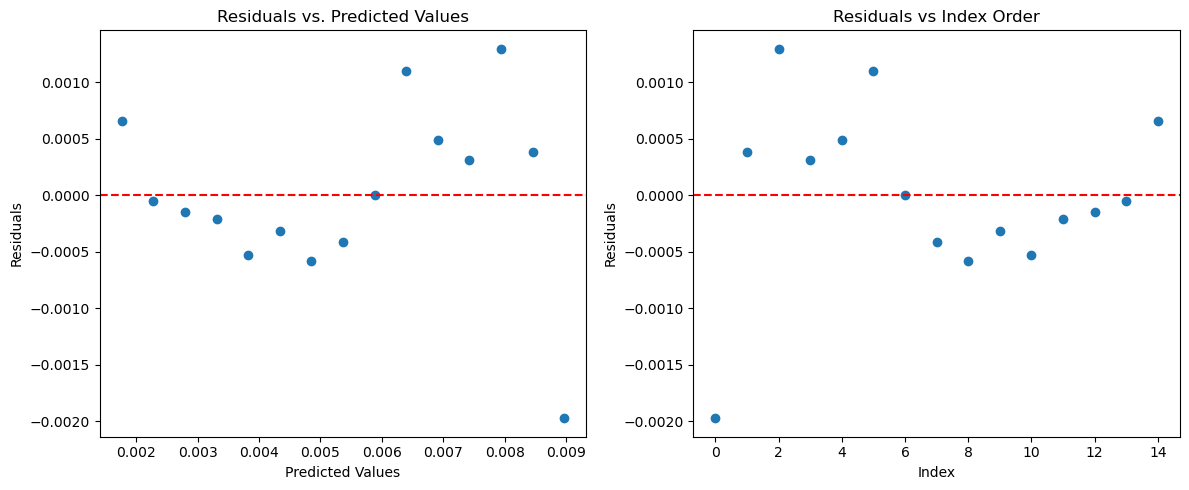

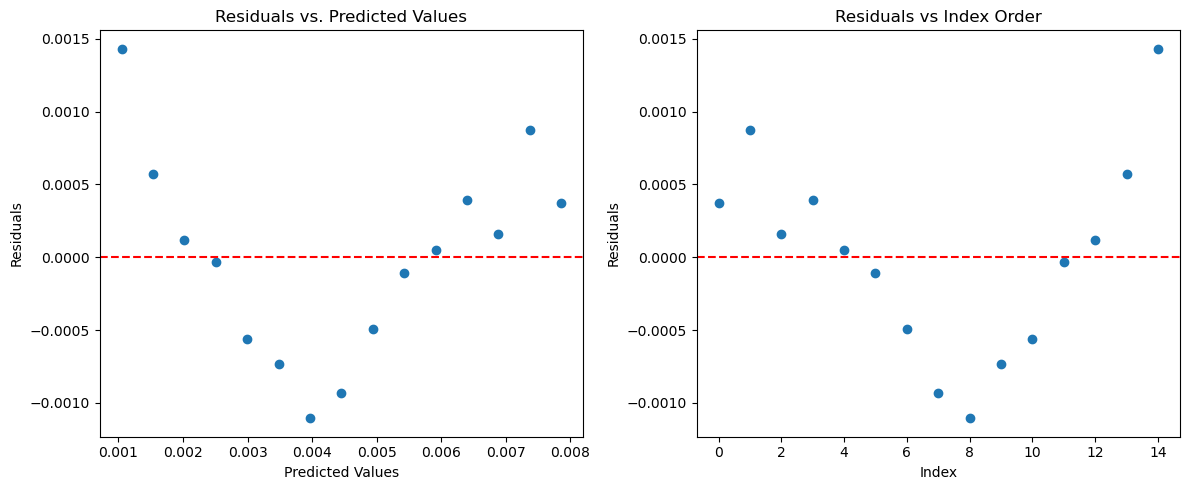

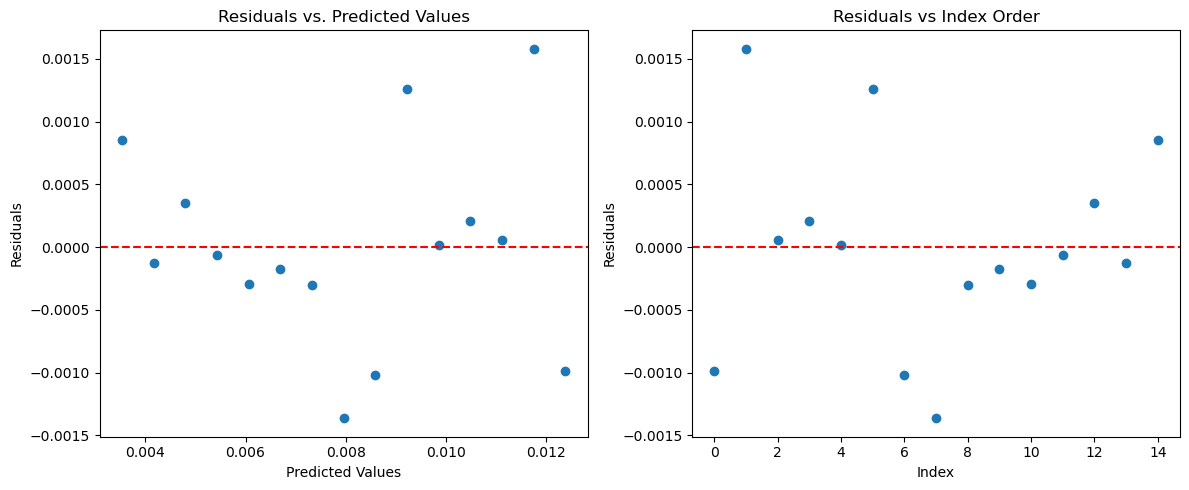

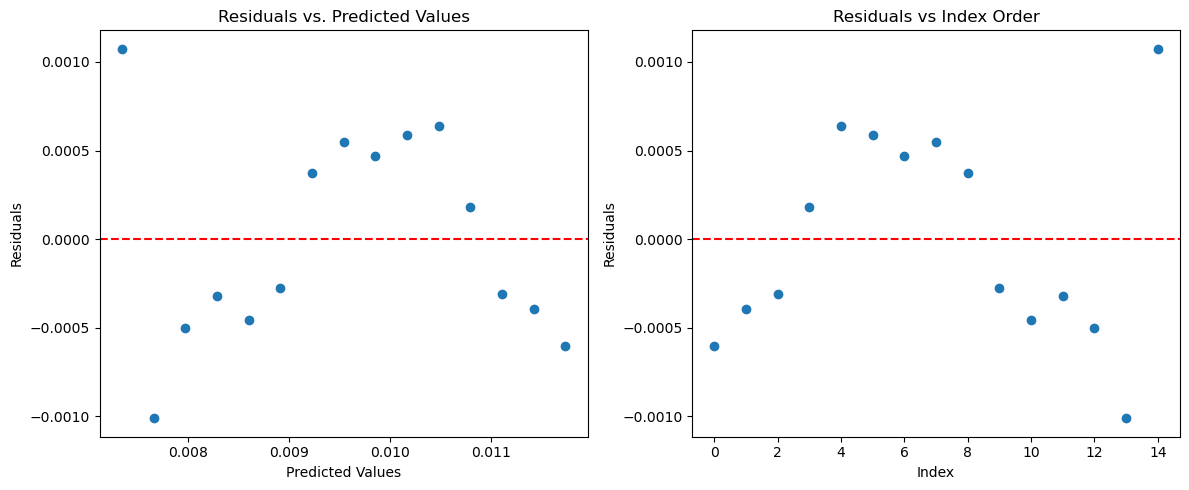

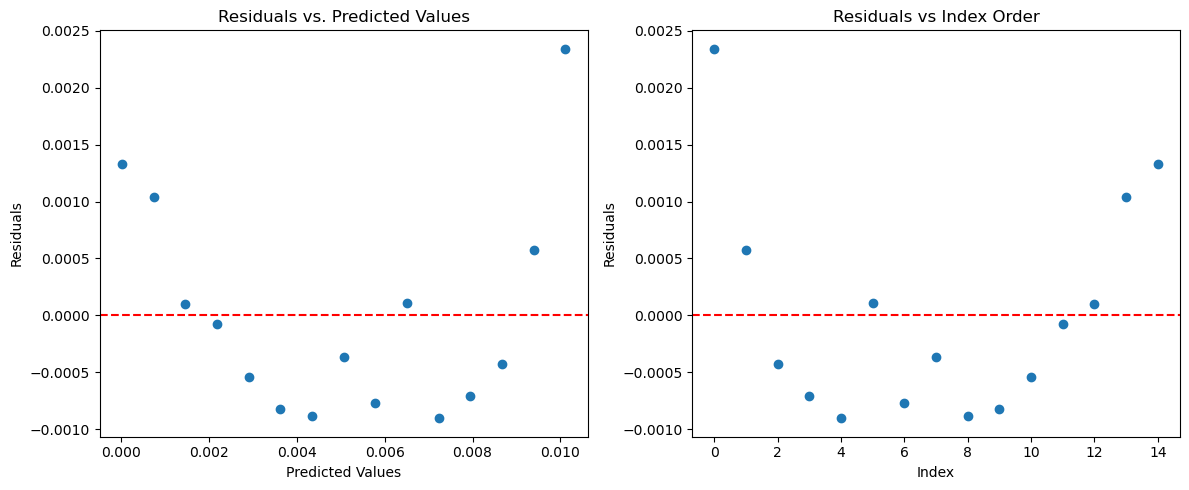

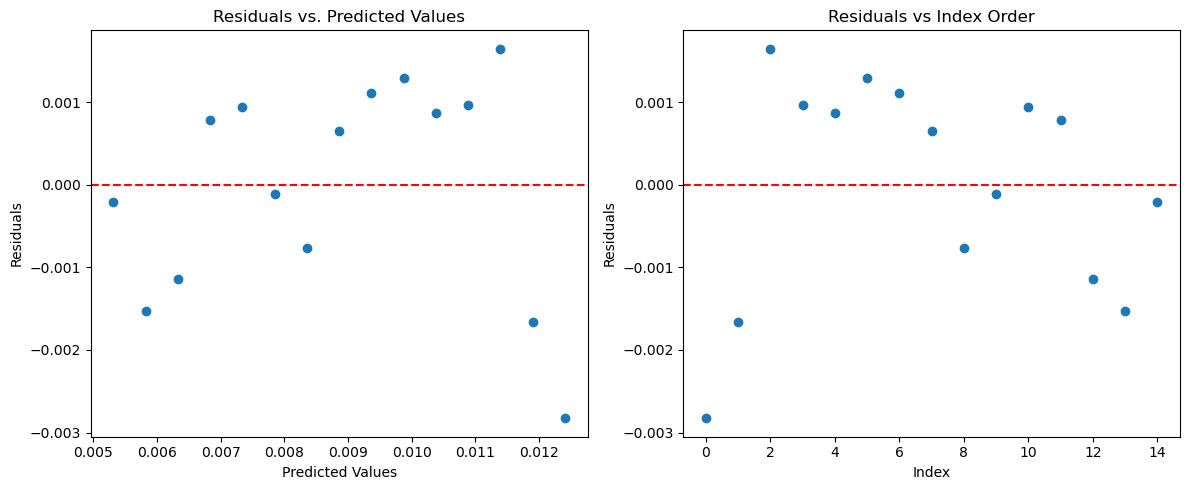

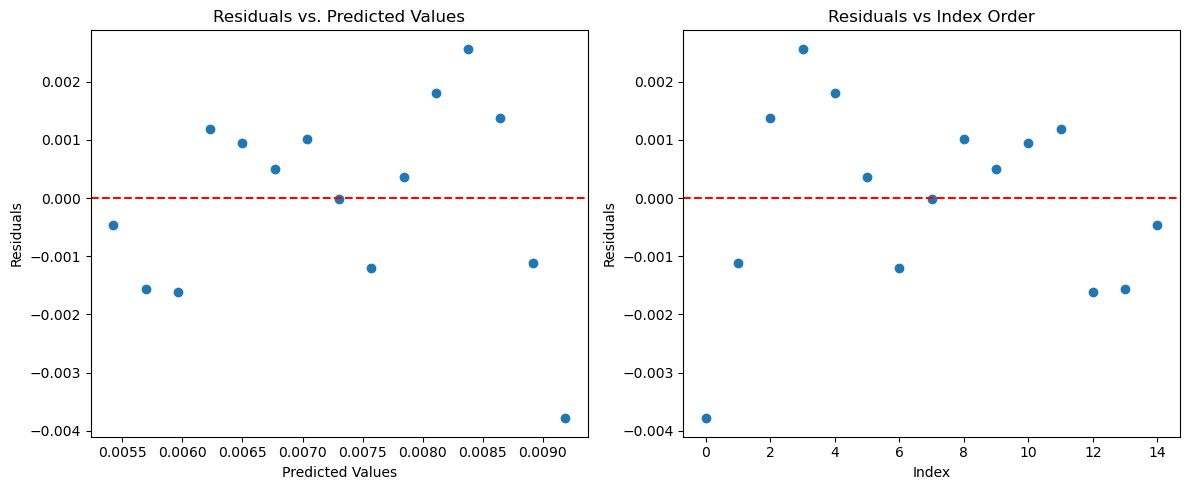

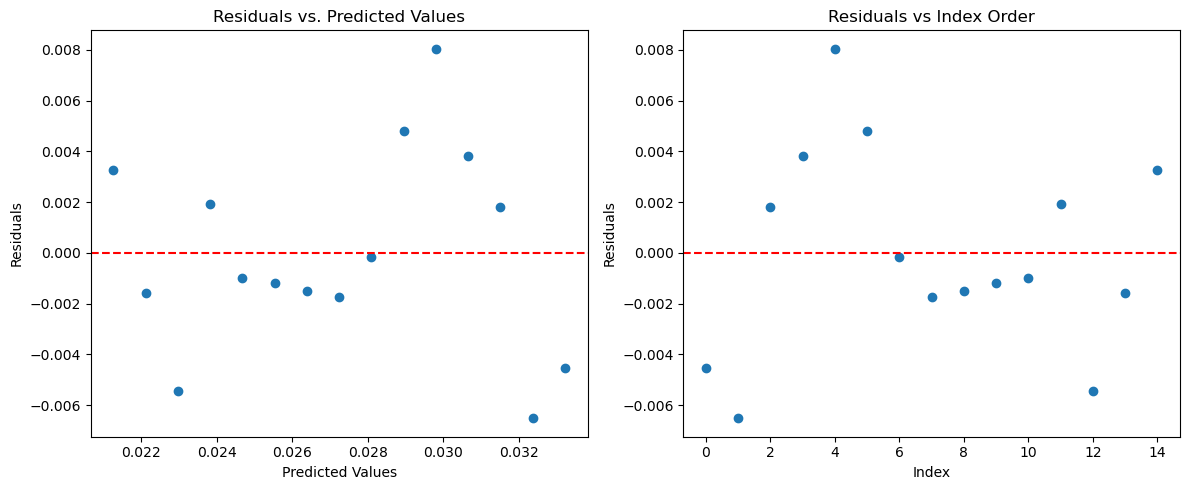

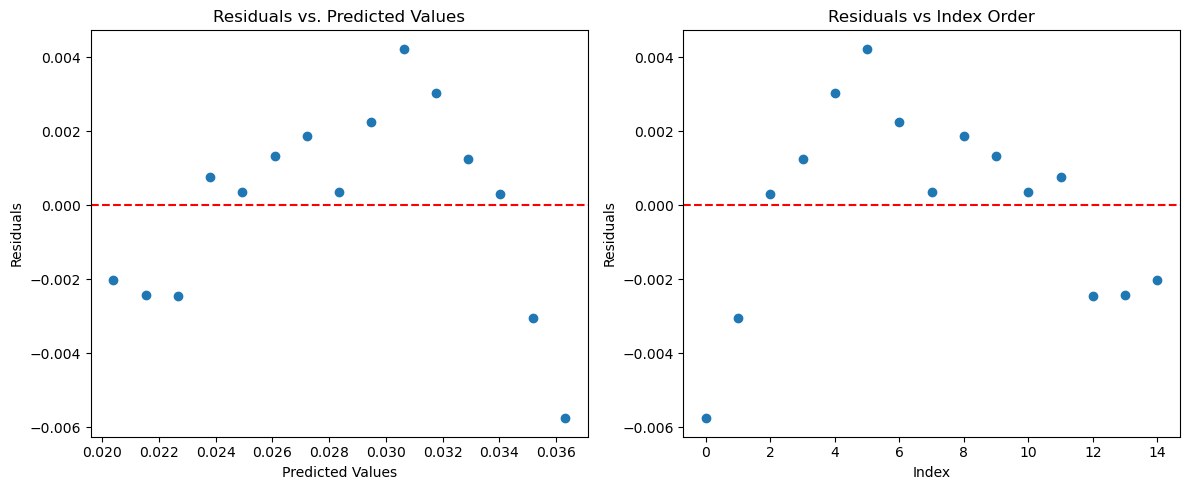

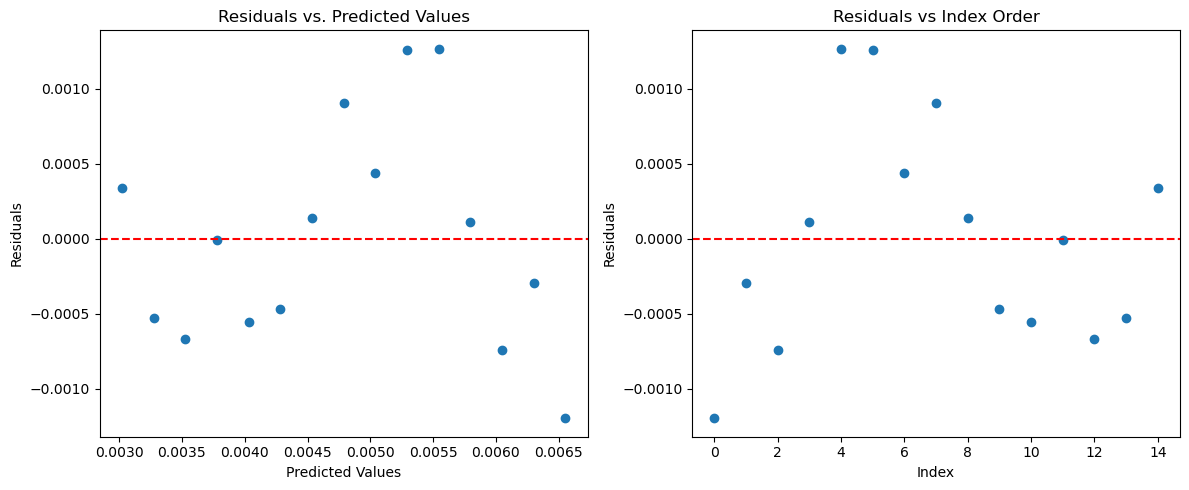

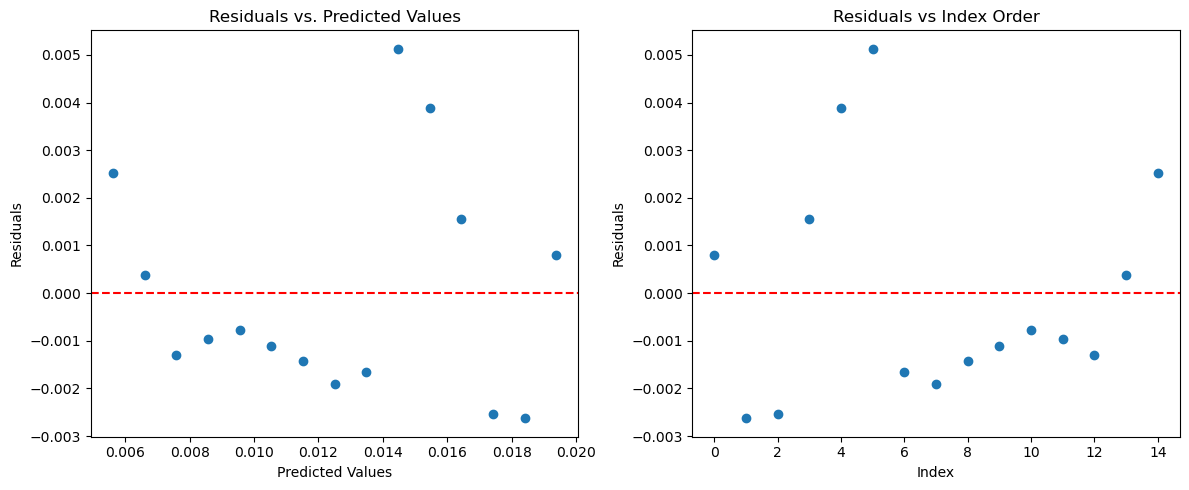

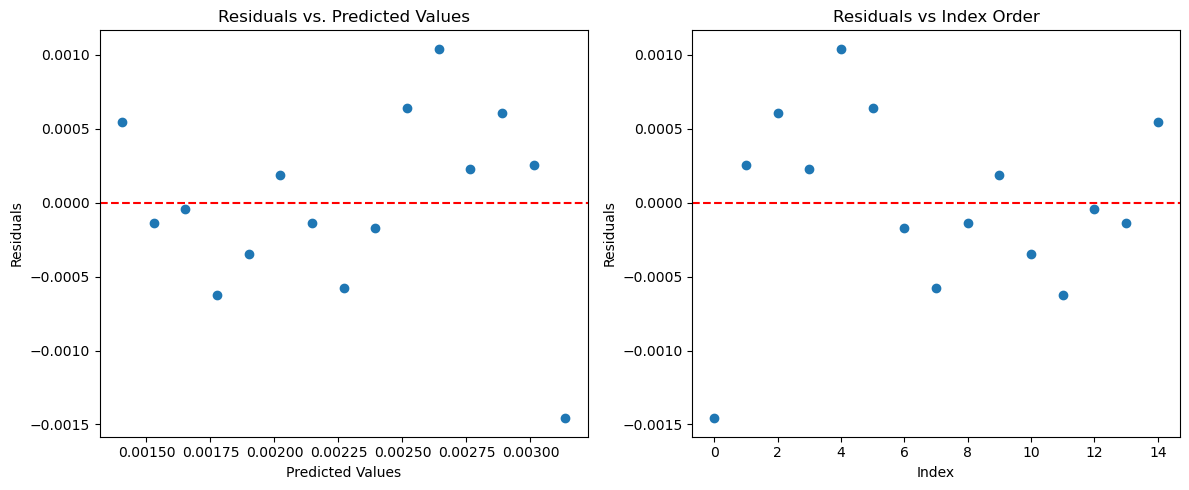

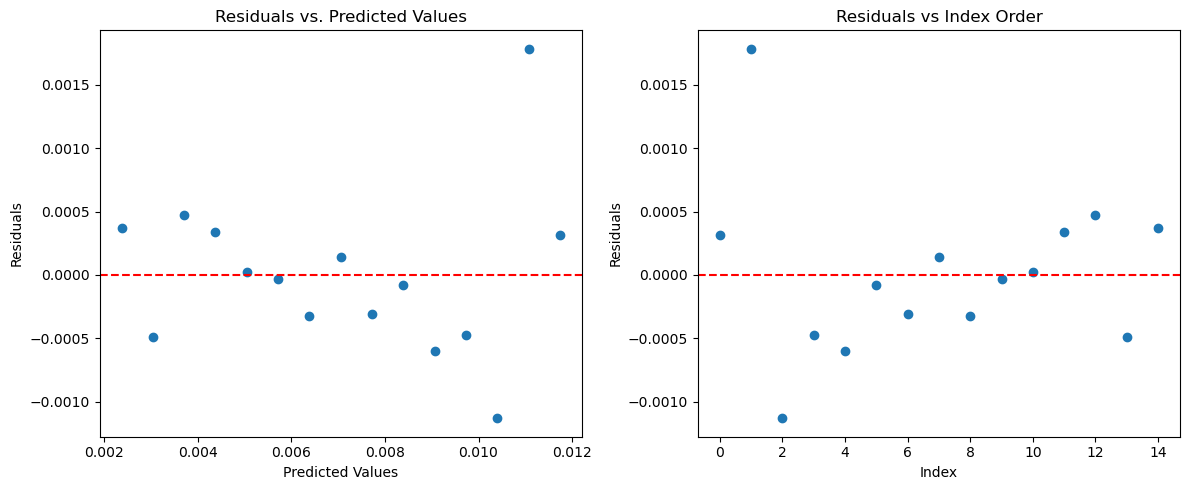

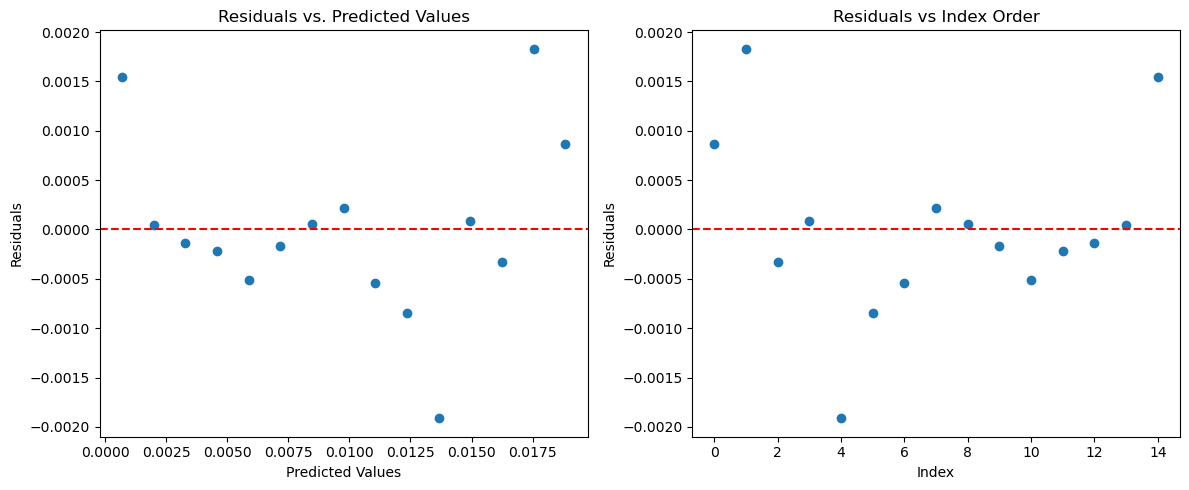

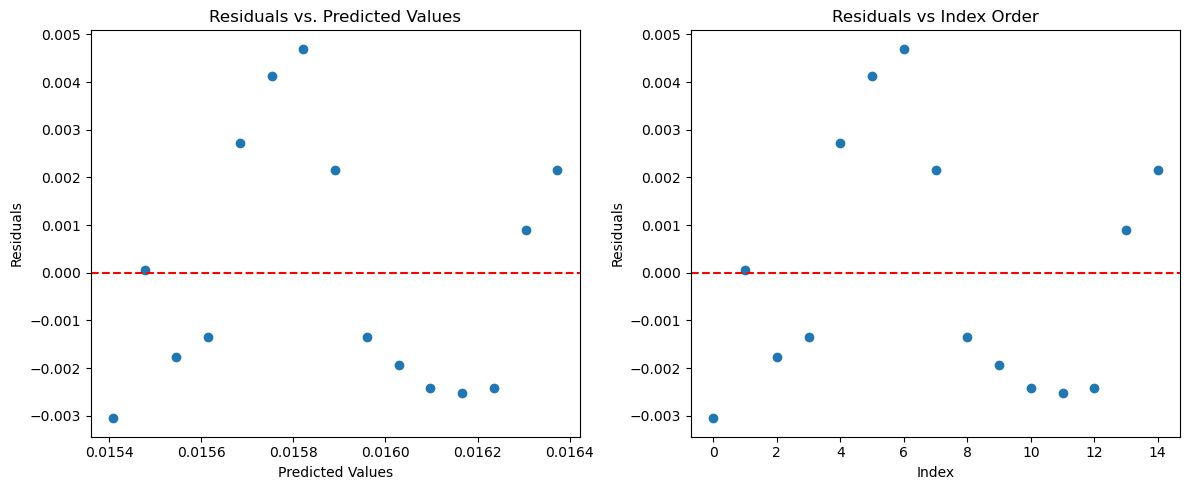

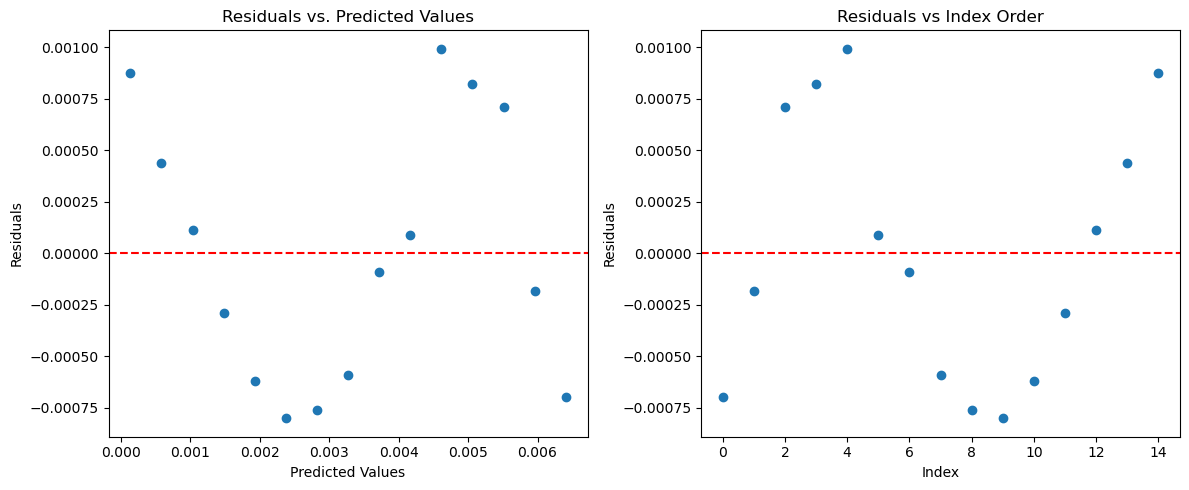

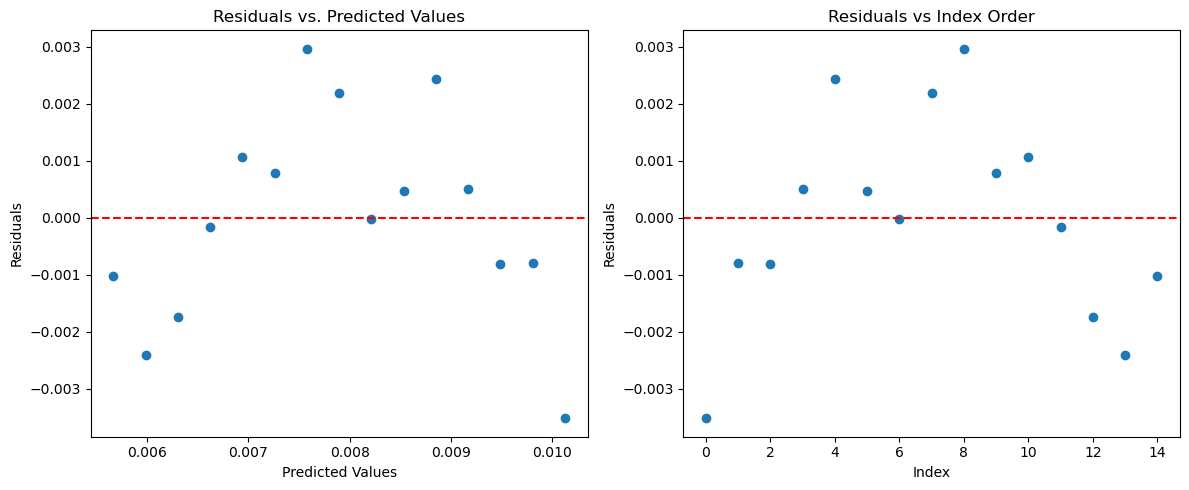

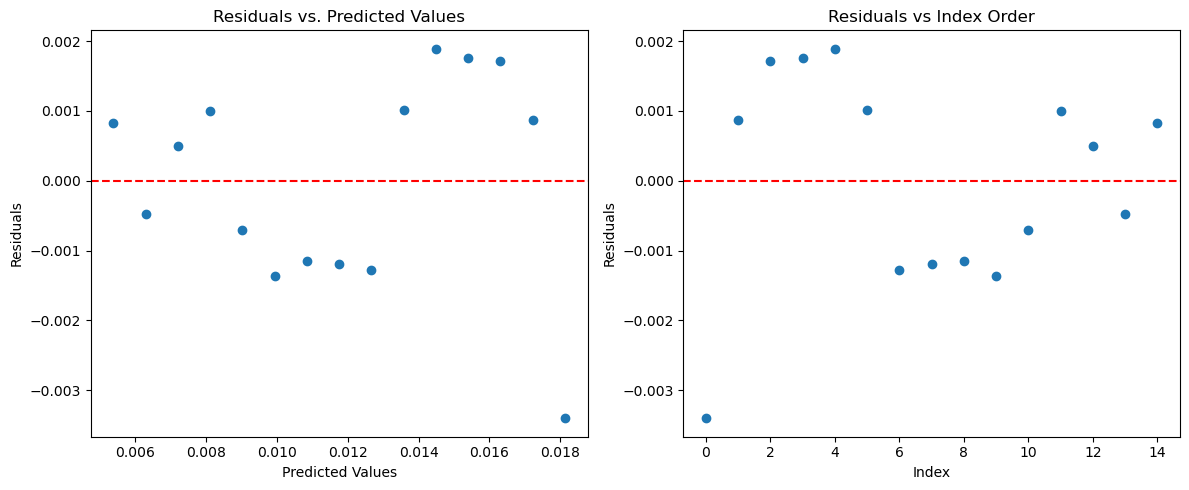

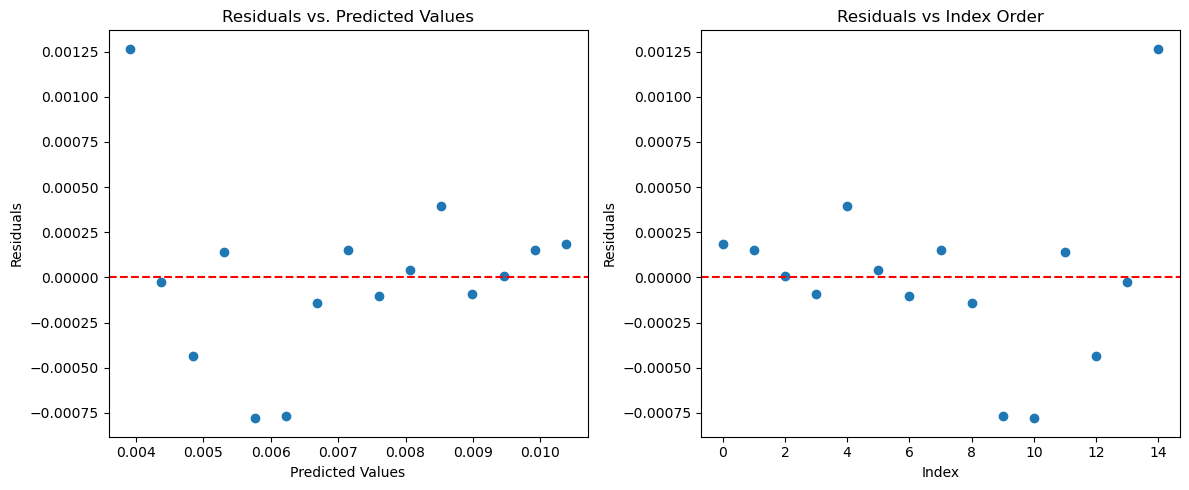

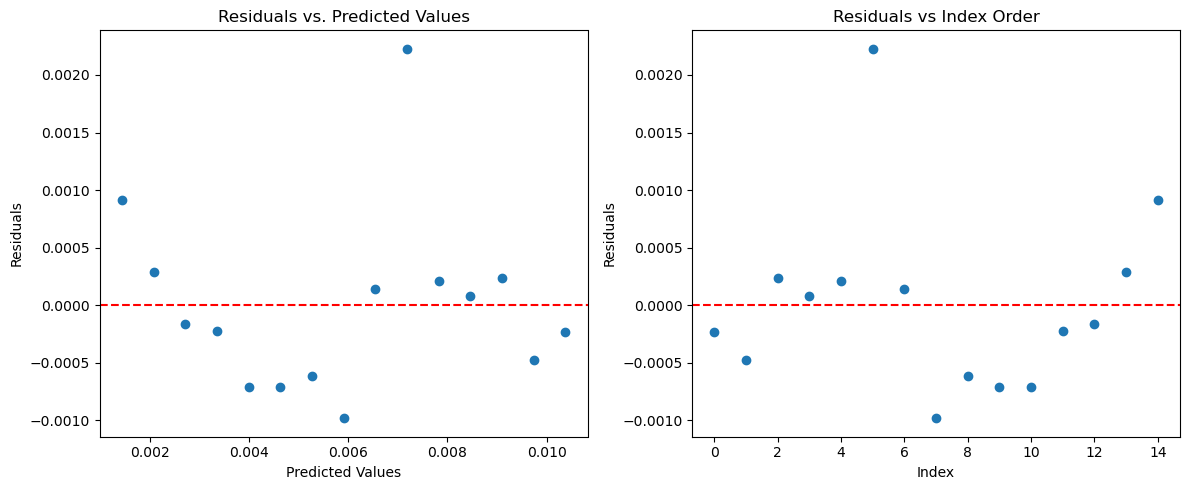

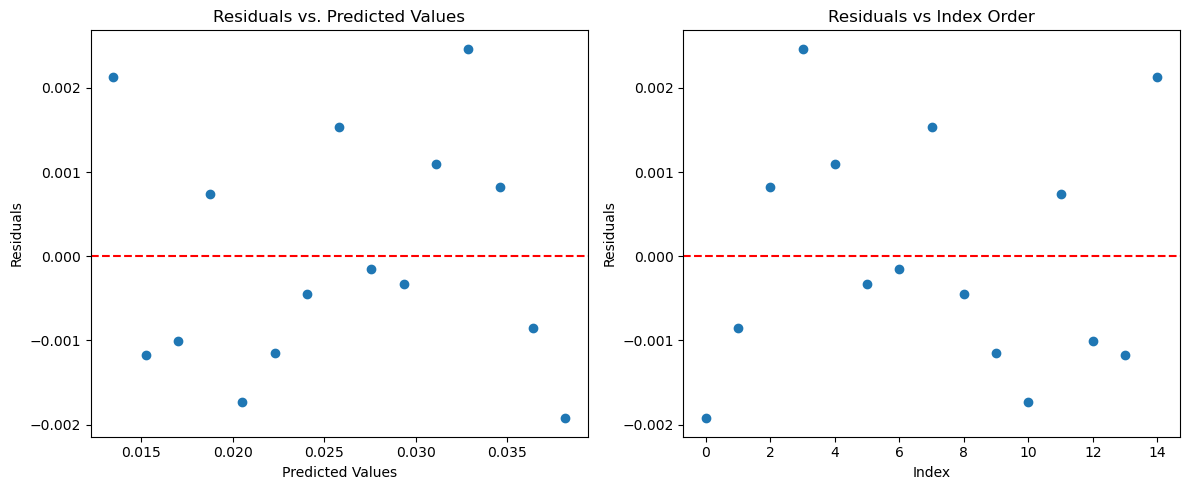

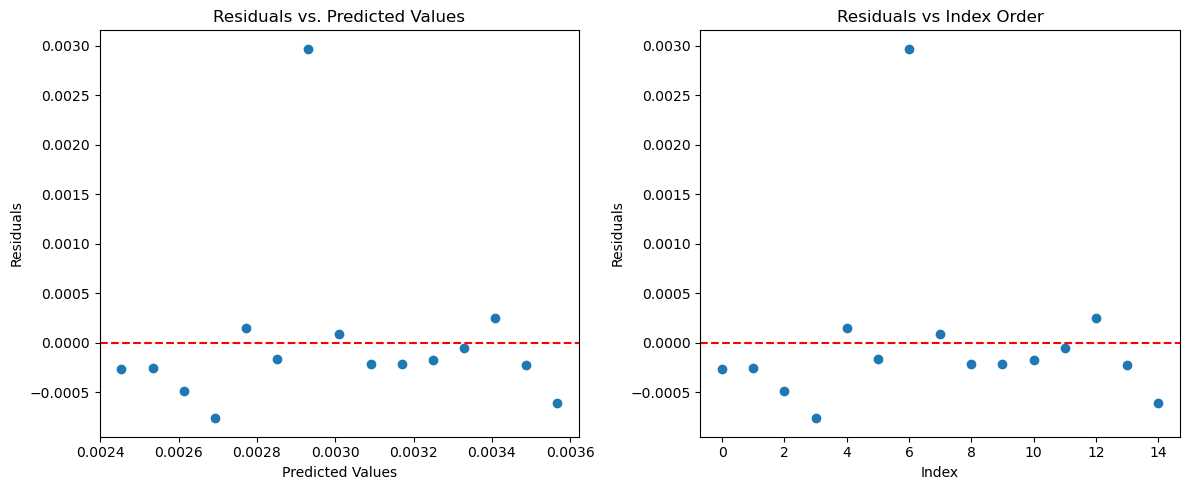

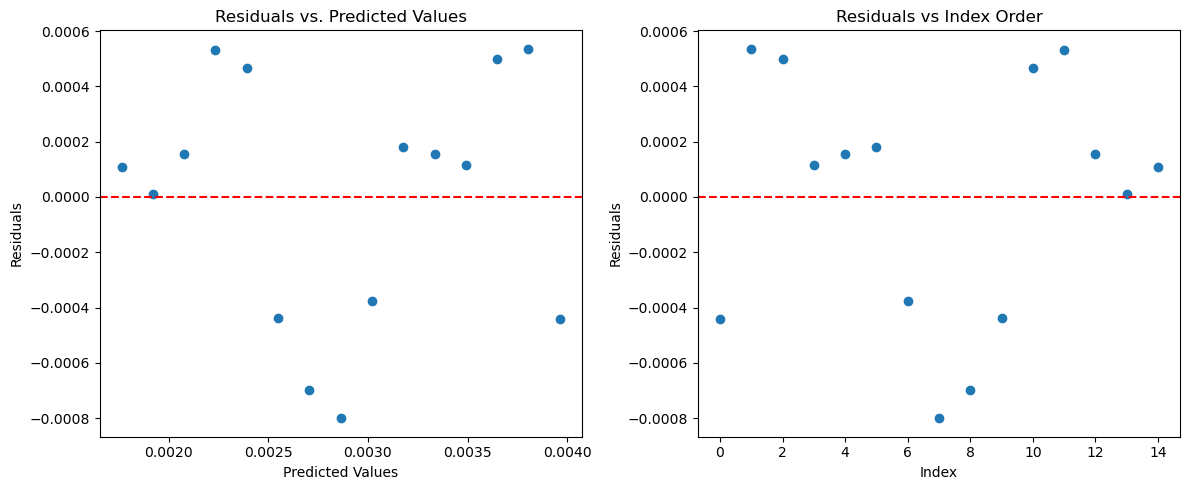

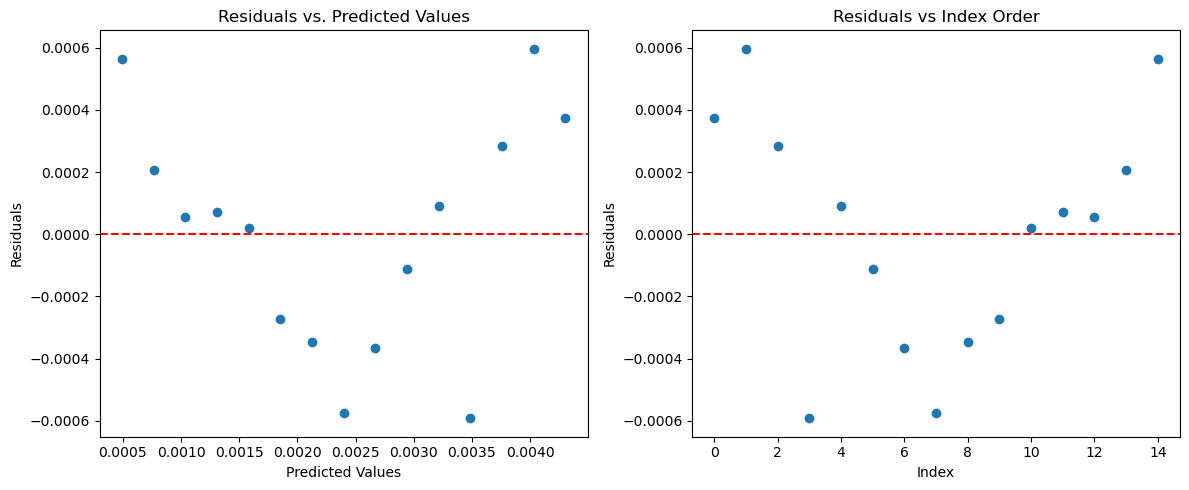

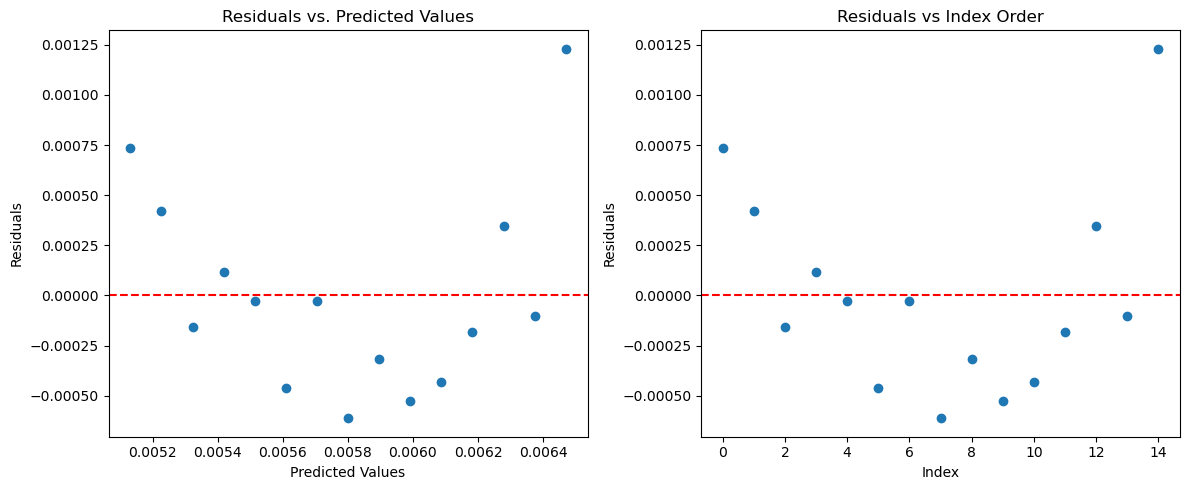

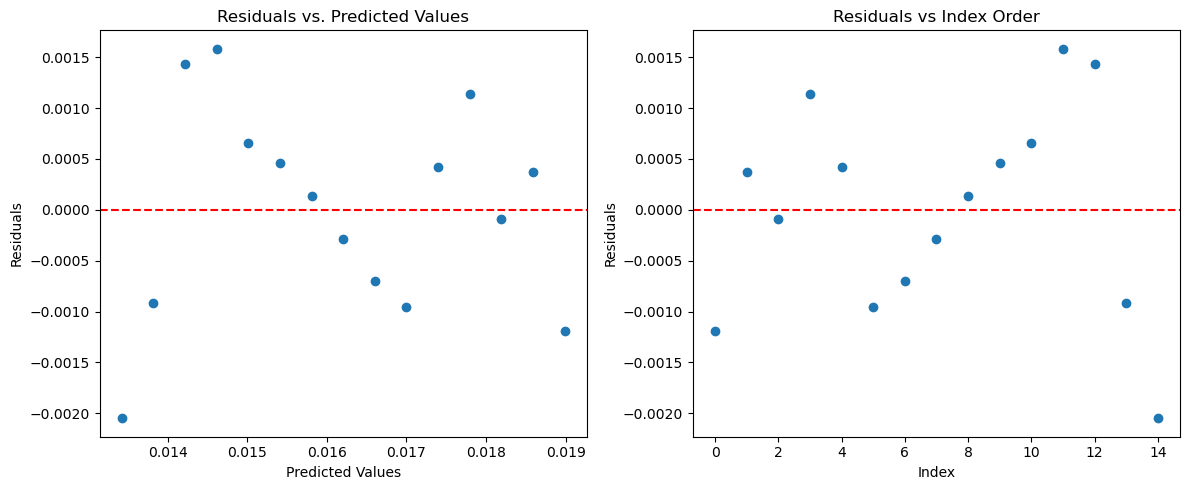

In [43]:
import plotly.graph_objects as go

robbery_data = crime[crime['International classification of crime for statistical purposes (ICCS)'] == 'Robbery']

# LINEAR REGRESSION NOT USED IN FINAL APP

# Define the linear regression function
def linear_regression(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x_squared = np.sum(x ** 2)
    
    m = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)
    b = (sum_y - m * sum_x) / n
    
    return m, b

# Add function to predict y values
def linreg_predict(X, y, coefficients):
    m, b = coefficients
    ypreds = m * X + b
    resids = y - ypreds
    return {'ypreds': ypreds, 'resids': resids}

# Function to plot residuals and predictions
def plot_residuals_predictions(ypreds, resids):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(ypreds, resids)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs. Predicted Values')

    plt.subplot(1, 2, 2)
    plt.plot(resids, marker='o', linestyle='none')
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Index')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Index Order')

    plt.tight_layout()
    plt.show()

# Loop over countries and perform linear regression
countries = robbery_data['Geopolitical entity (reporting)'].unique()
for country in countries:
    country_data = robbery_data[robbery_data['Geopolitical entity (reporting)'] == country]
    
    x = country_data['Time'].values
    y = country_data['norm_val'].values
    
    # Perform linear regression
    coefficients = linear_regression(x, y)
    
    # Calculate R-squared value
    ypreds = linreg_predict(x, y, coefficients)['ypreds']
    ss_res = np.sum((y - ypreds) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)
    
    # Plot regression line using Plotly
    m, b = coefficients
    regression_line = m * x + b
    
    fig = px.scatter(country_data, x='Time', y='norm_val', title=f'Robbery Cases in {country} Over Time')
    
    fig.add_traces(go.Scatter(x=x, y=regression_line, mode='lines', name='Regression Line'))
    
    fig.update_layout(
        xaxis_title='Year',
        yaxis_title='Number of Cases (Scaled)',
        template='plotly_white',
        width=900,
        height=600,
        margin=dict(l=50, r=50, t=100, b=50)
    )
    
    fig.update_xaxes(tickangle=45)
    
    # Add R-squared value as text annotation
    fig.add_annotation(
        xref='paper', yref='paper',
        x=0.95, y=0.05,
        text=f'R-squared: {r_squared:.2f}',
        showarrow=False,
        font=dict(size=12, color='black'),
        bgcolor='rgba(255, 255, 255, 0.7)',
        bordercolor='rgba(0, 0, 0, 0.7)',
        borderwidth=1
    )
    
    fig.show()
    
    # Plot residuals and predictions for diagnostic checks
    plot_residuals_predictions(ypreds, y - ypreds)


Shown above are linear regression plots using robbery data per nation in the EU over time. Additionally, below each national plot, analysis plots of the residuals are shown. These are done to verify the assumptions made when fitting a linear model. While some models fit extremely poorly (such as Luxembourg with an r2 of only 0.01), the majority exhibit high goodness of fits. This is further supported with the residuals analysis, which show a net zero error placed across a seemily random pattern. Most Residuals vs. Predicted Values plots have no clear pattern, supporting the assumption of constant variance. This is also the case with the Residuals vs. Index plots, suggesting a lack of autocorrelation in the majority of cases.

In [44]:
merged_df = pd.merge(train_system_ohe, crime_ohe, how='inner')
merged_df

Empty DataFrame
Columns: [Time frequency, Unit of measure, Transport coverage, Time, value, Geopolitical entity (reporting)_AUSTRIA, Geopolitical entity (reporting)_BELGIUM, Geopolitical entity (reporting)_BULGARIA, Geopolitical entity (reporting)_CROATIA, Geopolitical entity (reporting)_CYPRUS, Geopolitical entity (reporting)_CZECHIA, Geopolitical entity (reporting)_DENMARK, Geopolitical entity (reporting)_ESTONIA, Geopolitical entity (reporting)_FINLAND, Geopolitical entity (reporting)_FRANCE, Geopolitical entity (reporting)_GERMANY, Geopolitical entity (reporting)_GREECE, Geopolitical entity (reporting)_HUNGARY, Geopolitical entity (reporting)_IRELAND, Geopolitical entity (reporting)_ITALY, Geopolitical entity (reporting)_LATVIA, Geopolitical entity (reporting)_LITHUANIA, Geopolitical entity (reporting)_LUXEMBOURG, Geopolitical entity (reporting)_MALTA, Geopolitical entity (reporting)_NETHERLANDS, Geopolitical entity (reporting)_POLAND, Geopolitical entity (reporting)_PORTUGAL, Geopolitical entity (reporting)_ROMANIA, Geopolitical entity (reporting)_SLOVAKIA, Geopolitical entity (reporting)_SLOVENIA, Geopolitical entity (reporting)_SPAIN, Geopolitical entity (reporting)_SWEDEN, International classification of crime for statistical purposes (ICCS)_Acts against computer systems, International classification of crime for statistical purposes (ICCS)_Attempted intentional homicide, International classification of crime for statistical purposes (ICCS)_Bribery, International classification of crime for statistical purposes (ICCS)_Burglary, International classification of crime for statistical purposes (ICCS)_Burglary of private residential premises, International classification of crime for statistical purposes (ICCS)_Child pornography, International classification of crime for statistical purposes (ICCS)_Corruption, International classification of crime for statistical purposes (ICCS)_Fraud, International classification of crime for statistical purposes (ICCS)_Intentional homicide, International classification of crime for statistical purposes (ICCS)_Kidnapping, International classification of crime for statistical purposes (ICCS)_Money laundering, International classification of crime for statistical purposes (ICCS)_Participation in an organized criminal group, International classification of crime for statistical purposes (ICCS)_Rape, International classification of crime for statistical purposes (ICCS)_Robbery, International classification of crime for statistical purposes (ICCS)_Serious assault, International classification of crime for statistical purposes (ICCS)_Sexual assault, International classification of crime for statistical purposes (ICCS)_Sexual exploitation, International classification of crime for statistical purposes (ICCS)_Sexual violence, International classification of crime for statistical purposes (ICCS)_Theft, International classification of crime for statistical purposes (ICCS)_Theft of a motorized vehicle or parts thereof, International classification of crime for statistical purposes (ICCS)_Unlawful acts involving controlled drugs or precursors]
Index: []

[0 rows x 53 columns]

In [46]:
max_year = happiness['Time'].max()
happiness = happiness.drop(happiness[happiness.Time != max_year].index)
happiness_my = happiness[happiness['International Standard Classification of Education (ISCED 2011)'] == 'All ISCED 2011 levels']

happiness_my

Time frequency Unit of measure  \
5             Annual      Percentage   
8             Annual      Percentage   
11            Annual      Percentage   
14            Annual      Percentage   
20            Annual      Percentage   
...              ...             ...   
11927         Annual      Percentage   
11930         Annual      Percentage   
11933         Annual      Percentage   
11936         Annual      Percentage   
11939         Annual      Percentage   

      International Standard Classification of Education (ISCED 2011)  \
5                                  All ISCED 2011 levels                
8                                  All ISCED 2011 levels                
11                                 All ISCED 2011 levels                
14                                 All ISCED 2011 levels                
20                                 All ISCED 2011 levels                
...                                                  ...                
11927                              All ISCED 2011 levels                
11930                              All ISCED 2011 levels                
11933                              All ISCED 2011 levels                
11936                              All ISCED 2011 levels                
11939                              All ISCED 2011 levels                

      Frequency      Sex            Age class Geopolitical entity (reporting)  \
5        Always    Total  From 16 to 24 years                         BELGIUM   
8        Always    Total  From 16 to 24 years                        BULGARIA   
11       Always    Total  From 16 to 24 years                         CZECHIA   
14       Always    Total  From 16 to 24 years                         DENMARK   
20       Always    Total  From 16 to 24 years                         ESTONIA   
...         ...      ...                  ...                             ...   
11927     Never  Females     75 years or over                         ROMANIA   
11930     Never  Females     75 years or over                        SLOVENIA   
11933     Never  Females     75 years or over                        SLOVAKIA   
11936     Never  Females     75 years or over                         FINLAND   
11939     Never  Females     75 years or over                          SWEDEN   

       Time  value  
5      2022   19.6  
8      2022   14.9  
11     2022    8.6  
14     2022    8.5  
20     2022    6.1  
...     ...    ...  
11927  2022    6.1  
11930  2022    3.2  
11933  2022    2.1  
11936  2022    2.0  
11939  2022    0.3  

[2730 rows x 9 columns]

In [47]:
# Initialize the dictionary with age groups as keys
happiness_dict = {
    "country": [],
    'From 16 to 24 years': [], '16 years or over': [], 'From 25 to 34 years': [],
    'From 35 to 49 years': [], 'From 50 to 64 years': [], 'From 65 to 74 years': [],
    '75 years or over': []
}


# Process each country
for country in eu_nations:
    happiness_dict["country"].append(country)
    
    # Filter dataset for the current country
    df_country = happiness_my[happiness_my["Geopolitical entity (reporting)"] == country]
    
    # Process each age group
    for age_group in ['From 16 to 24 years', '16 years or over', 'From 25 to 34 years', 'From 35 to 49 years', 'From 50 to 64 years', 'From 65 to 74 years', '75 years or over']:
        # Filter for relevant age group
        df_age_group = df_country[df_country["Age class"] == age_group]
        
        # Sum the values
        age_group_sum = df_age_group["value"].sum()
        
        # Append the sum to the respective age group in the dictionary
        happiness_dict[age_group].append(age_group_sum)

# Convert to DataFrame
happiness_df = pd.DataFrame(happiness_dict)

happiness_df

country  From 16 to 24 years  16 years or over  From 25 to 34 years  \
0       AUSTRIA                299.9             300.0                299.9   
1       BELGIUM                297.2             299.4                300.0   
2      BULGARIA                282.7             277.0                282.6   
3       CROATIA                297.4             291.0                287.4   
4        CYPRUS                298.0             298.4                298.4   
5       CZECHIA                286.9             283.8                285.4   
6       DENMARK                292.1             295.9                298.6   
7       ESTONIA                300.0             299.9                300.0   
8       FINLAND                299.7             298.7                300.2   
9        FRANCE                299.4             298.6                299.7   
10      GERMANY                  0.0               0.0                  0.0   
11       GREECE                300.1             299.9                299.8   
12      HUNGARY                299.9             300.1                300.1   
13      IRELAND                300.1             300.1                300.1   
14        ITALY                281.7             289.9                292.8   
15       LATVIA                295.8             294.6                297.7   
16    LITHUANIA                284.3             275.8                278.4   
17   LUXEMBOURG                298.7             297.1                297.8   
18        MALTA                286.2             293.6                294.2   
19  NETHERLANDS                298.4             298.3                298.6   
20       POLAND                297.6             295.7                299.0   
21     PORTUGAL                299.9             297.3                299.8   
22      ROMANIA                296.0             289.1                291.2   
23     SLOVAKIA                285.2             277.8                277.5   
24        SPAIN                300.0             300.0                300.2   
25       SWEDEN                299.9             300.1                300.1   
26     SLOVENIA                299.0             298.5                298.6   

    From 35 to 49 years  From 50 to 64 years  From 65 to 74 years  \
0                 299.9                299.9                300.0   
1                 299.8                299.7                299.5   
2                 282.9                276.6                270.7   
3                 293.7                290.2                293.4   
4                 299.1                299.0                299.1   
5                 288.1                281.6                283.2   
6                 295.5                297.9                295.2   
7                 299.9                300.1                300.1   
8                 299.5                299.2                297.1   
9                 299.4                298.5                297.7   
10                  0.0                  0.0                  0.0   
11                300.0                299.9                300.1   
12                299.9                299.9                299.9   
13                300.1                299.8                300.0   
14                292.8                292.7                289.0   
15                296.5                294.8                291.7   
16                273.4                272.2                279.1   
17                298.5                296.4                296.1   
18                295.7                291.3                295.7   
19                299.5                298.1                298.1   
20                296.9                296.0                292.6   
21                299.5                298.8                294.5   
22                291.7                285.9                286.5   
23                282.6                274.3                275.4   
24                299.9                300.1                299.9   
2

In [48]:
crime_my = crime[crime['Time'] == max_year]
crime_my

Time frequency  \
629           Annual   
644           Annual   
659           Annual   
674           Annual   
689           Annual   
...              ...   
25544         Annual   
25559         Annual   
25574         Annual   
25589         Annual   
25604         Annual   

      International classification of crime for statistical purposes (ICCS)  \
629                                 Intentional homicide                      
644                                 Intentional homicide                      
659                                 Intentional homicide                      
674                                 Intentional homicide                      
689                                 Intentional homicide                      
...                                                  ...                      
25544       Participation in an organized criminal group                      
25559       Participation in an organized criminal group                      
25574       Participation in an organized criminal group                      
25589       Participation in an organized criminal group                      
25604       Participation in an organized criminal group                      

                        Unit of measure Geopolitical entity (reporting)  Time  \
629    Per hundred thousand inhabitants                         BELGIUM  2022   
644    Per hundred thousand inhabitants                        BULGARIA  2022   
659    Per hundred thousand inhabitants                         CZECHIA  2022   
674    Per hundred thousand inhabitants                         DENMARK  2022   
689    Per hundred thousand inhabitants                         GERMANY  2022   
...                                 ...                             ...   ...   
25544  Per hundred thousand inhabitants                        PORTUGAL  2022   
25559  Per hundred thousand inhabitants                         ROMANIA  2022   
25574  Per hundred thousand inhabitants                        SLOVENIA  2022   
25589  Per hundred thousand inhabitants                        SLOVAKIA  2022   
25604  Per hundred thousand inhabitants                         FINLAND  2022   

       value  norm_val  
629     1.54  0.000282  
644     1.11  0.000204  
659     0.75  0.000138  
674     1.00  0.000183  
689     0.74  0.000136  
...      ...       ...  
25544   0.06  0.000011  
25559   2.71  0.000497  
25574   0.00  0.000000  
25589   0.15  0.000028  
25604   0.05  0.000009  

[498 rows x 7 columns]

In [49]:
train_system

Time frequency                   Unit of measure Transport coverage  \
36          Annual  Millions of passenger-kilometres    Total transport   
37          Annual  Millions of passenger-kilometres    Total transport   
38          Annual  Millions of passenger-kilometres    Total transport   
39          Annual  Millions of passenger-kilometres    Total transport   
40          Annual  Millions of passenger-kilometres    Total transport   
..             ...                               ...                ...   
355         Annual  Millions of passenger-kilometres    Total transport   
356         Annual  Millions of passenger-kilometres    Total transport   
357         Annual  Millions of passenger-kilometres    Total transport   
358         Annual  Millions of passenger-kilometres    Total transport   
359         Annual  Millions of passenger-kilometres    Total transport   

    Geopolitical entity (reporting)  Time    value  
36                          BELGIUM  2012      NaN  
37                          BELGIUM  2013      NaN  
38                          BELGIUM  2014      NaN  
39                          BELGIUM  2015      NaN  
40                          BELGIUM  2016      NaN  
..                              ...   ...      ...  
355                          SWEDEN  2019  14617.0  
356                          SWEDEN  2020   8129.0  
357                          SWEDEN  2021   8027.0  
358                          SWEDEN  2022  12879.0  
359                          SWEDEN  2023      NaN  

[324 rows x 6 columns]

In [50]:
train_system_my = train_system[train_system['Time'] == max_year]
train_system_my

Time frequency                   Unit of measure Transport coverage  \
46          Annual  Millions of passenger-kilometres    Total transport   
58          Annual  Millions of passenger-kilometres    Total transport   
70          Annual  Millions of passenger-kilometres    Total transport   
82          Annual  Millions of passenger-kilometres    Total transport   
94          Annual  Millions of passenger-kilometres    Total transport   
106         Annual  Millions of passenger-kilometres    Total transport   
118         Annual  Millions of passenger-kilometres    Total transport   
130         Annual  Millions of passenger-kilometres    Total transport   
142         Annual  Millions of passenger-kilometres    Total transport   
154         Annual  Millions of passenger-kilometres    Total transport   
166         Annual  Millions of passenger-kilometres    Total transport   
178         Annual  Millions of passenger-kilometres    Total transport   
190         Annual  Millions of passenger-kilometres    Total transport   
202         Annual  Millions of passenger-kilometres    Total transport   
214         Annual  Millions of passenger-kilometres    Total transport   
226         Annual  Millions of passenger-kilometres    Total transport   
238         Annual  Millions of passenger-kilometres    Total transport   
250         Annual  Millions of passenger-kilometres    Total transport   
262         Annual  Millions of passenger-kilometres    Total transport   
274         Annual  Millions of passenger-kilometres    Total transport   
286         Annual  Millions of passenger-kilometres    Total transport   
298         Annual  Millions of passenger-kilometres    Total transport   
310         Annual  Millions of passenger-kilometres    Total transport   
322         Annual  Millions of passenger-kilometres    Total transport   
334         Annual  Millions of passenger-kilometres    Total transport   
346         Annual  Millions of passenger-kilometres    Total transport   
358         Annual  Millions of passenger-kilometres    Total transport   

    Geopolitical entity (reporting)  Time     value  
46                          BELGIUM  2022       NaN  
58                         BULGARIA  2022    1600.0  
70                          CZECHIA  2022    9394.0  
82                          DENMARK  2022    6376.0  
94                          GERMANY  2022   92313.0  
106                         ESTONIA  2022     382.0  
118                         IRELAND  2022    1748.0  
130                          GREECE  2022    1117.0  
142                           SPAIN  2022   27489.0  
154                          FRANCE  2022  102814.0  
166                         CROATIA  2022     812.0  
178                           ITALY  2022   46143.0  
190                          CYPRUS  2022       NaN  
202                          LATVIA  2022     541.0  
214                       LITHUANIA  2022     382.0  
226                      LUXEMBOURG  2022     389.0  
238                         HUNGARY  2022       NaN  
250                           MALTA  2022       NaN  
262                     NETHERLANDS  2022       NaN  
274                         AUSTRIA  2022   12371.0  
286                          POLAND  2022   23646.0  
298                        PORTUGAL  2022    4419.0  
310                         ROMANIA  2022    5616.0  
322                        SLOVENIA  2022     645.0  
334                        SLOVAKIA  2022    3168.0  
346                         FINLAND  2022    4572.0  
358                          SWEDEN  2022   12879.0

In [52]:
crime_my_ohe_cols = ['International classification of crime for statistical purposes (ICCS)', 'Geopolitical entity (reporting)']
crime_my_ohe = pd.get_dummies(crime_my, columns=crime_ohe_cols, dtype=int)
crime_my_ohe

Time frequency                   Unit of measure  Time  value  norm_val  \
629           Annual  Per hundred thousand inhabitants  2022   1.54  0.000282   
644           Annual  Per hundred thousand inhabitants  2022   1.11  0.000204   
659           Annual  Per hundred thousand inhabitants  2022   0.75  0.000138   
674           Annual  Per hundred thousand inhabitants  2022   1.00  0.000183   
689           Annual  Per hundred thousand inhabitants  2022   0.74  0.000136   
...              ...                               ...   ...    ...       ...   
25544         Annual  Per hundred thousand inhabitants  2022   0.06  0.000011   
25559         Annual  Per hundred thousand inhabitants  2022   2.71  0.000497   
25574         Annual  Per hundred thousand inhabitants  2022   0.00  0.000000   
25589         Annual  Per hundred thousand inhabitants  2022   0.15  0.000028   
25604         Annual  Per hundred thousand inhabitants  2022   0.05  0.000009   

       International classification of crime for statistical purposes (ICCS)_Acts against computer systems  \
629                                                    0                                                     
644                                                    0                                                     
659                                                    0                                                     
674                                                    0                                                     
689                                                    0                                                     
...                                                  ...                                                     
25544                                                  0                                                     
25559                                                  0                                                     
25574                                                  0                                                     
25589                                                  0                                                     
25604                                                  0                                                     

       International classification of crime for statistical purposes (ICCS)_Attempted intentional homicide  \
629                                                    0                                                      
644                                                    0                                                      
659                                                    0                                                      
674                                                    0                                                      
689                                                    0                                                      
...                                                  ...                                                      
25544                                                  0                                                      
25559                                                  0                                                      
25574                                                  0                                                      
25589                                                  0                                                      
25604                                                  0                                                      

       International classification of crime for statistical purposes (ICCS)_Bribery  \
629                                                    0                               
644                                                    0                               
659                                                    0                               
674                        

In [53]:
happiness_my_ohe_cols = ['International Standard Classification of Education (ISCED 2011)', 'Frequency', 'Sex', 'Age class', 'Geopolitical entity (reporting)']
happiness_my_ohe = pd.get_dummies(happiness_my, columns=happiness_ohe_cols, dtype=int)
happiness_my_ohe

Time frequency Unit of measure  Time  value  \
5             Annual      Percentage  2022   19.6   
8             Annual      Percentage  2022   14.9   
11            Annual      Percentage  2022    8.6   
14            Annual      Percentage  2022    8.5   
20            Annual      Percentage  2022    6.1   
...              ...             ...   ...    ...   
11927         Annual      Percentage  2022    6.1   
11930         Annual      Percentage  2022    3.2   
11933         Annual      Percentage  2022    2.1   
11936         Annual      Percentage  2022    2.0   
11939         Annual      Percentage  2022    0.3   

       International Standard Classification of Education (ISCED 2011)_All ISCED 2011 levels  \
5                                                      1                                       
8                                                      1                                       
11                                                     1                                       
14                                                     1                                       
20                                                     1                                       
...                                                  ...                                       
11927                                                  1                                       
11930                                                  1                                       
11933                                                  1                                       
11936                                                  1                                       
11939                                                  1                                       

       Frequency_Always  Frequency_Most of the time  Frequency_Never  \
5                     1                           0                0   
8                     1                           0                0   
11                    1                           0                0   
14                    1                           0                0   
20                    1                           0                0   
...                 ...                         ...              ...   
11927                 0                           0                1   
11930                 0                           0                1   
11933                 0                           0                1   
11936                 0                           0                1   
11939                 0                           0                1   

       Frequency_Rarely  Frequency_Sometimes  ...  \
5                     0                    0  ...   
8                     0                    0  ...   
11                    0                    0  ...   
14                    0                    0  ...   
20                    0                    0  ...   
...                 ...                  ...  ...   
11927                 0                    0  ...   
11930                 0                    0  ...   
11933                 0                    0  ...   
11936                 0                    0  ...   
11939                 0                    0  ...   

       Geopolitical entity (reporting)_LUXEMBOURG  \
5                                               0   
8                                               0   
11                                              0   
14                                              0   
20                                              0   
...                                           ...   
11927                                           0   
11930                                           0   
11933                                           0   
11936                                           0   
11939                                           0   

       Geopolitical entity (reporting)_MALTA  \
5                            

In [54]:
trains_my_ohe_cols = ['Geopolitical entity (reporting)']
train_system_my_ohe = pd.get_dummies(train_system_my, columns=trains_ohe_cols, dtype=int)
train_system_my_ohe

Time frequency                   Unit of measure Transport coverage  Time  \
46          Annual  Millions of passenger-kilometres    Total transport  2022   
58          Annual  Millions of passenger-kilometres    Total transport  2022   
70          Annual  Millions of passenger-kilometres    Total transport  2022   
82          Annual  Millions of passenger-kilometres    Total transport  2022   
94          Annual  Millions of passenger-kilometres    Total transport  2022   
106         Annual  Millions of passenger-kilometres    Total transport  2022   
118         Annual  Millions of passenger-kilometres    Total transport  2022   
130         Annual  Millions of passenger-kilometres    Total transport  2022   
142         Annual  Millions of passenger-kilometres    Total transport  2022   
154         Annual  Millions of passenger-kilometres    Total transport  2022   
166         Annual  Millions of passenger-kilometres    Total transport  2022   
178         Annual  Millions of passenger-kilometres    Total transport  2022   
190         Annual  Millions of passenger-kilometres    Total transport  2022   
202         Annual  Millions of passenger-kilometres    Total transport  2022   
214         Annual  Millions of passenger-kilometres    Total transport  2022   
226         Annual  Millions of passenger-kilometres    Total transport  2022   
238         Annual  Millions of passenger-kilometres    Total transport  2022   
250         Annual  Millions of passenger-kilometres    Total transport  2022   
262         Annual  Millions of passenger-kilometres    Total transport  2022   
274         Annual  Millions of passenger-kilometres    Total transport  2022   
286         Annual  Millions of passenger-kilometres    Total transport  2022   
298         Annual  Millions of passenger-kilometres    Total transport  2022   
310         Annual  Millions of passenger-kilometres    Total transport  2022   
322         Annual  Millions of passenger-kilometres    Total transport  2022   
334         Annual  Millions of passenger-kilometres    Total transport  2022   
346         Annual  Millions of passenger-kilometres    Total transport  2022   
358         Annual  Millions of passenger-kilometres    Total transport  2022   

        value  Geopolitical entity (reporting)_AUSTRIA  \
46        NaN                                        0   
58     1600.0                                        0   
70     9394.0                                        0   
82     6376.0                                        0   
94    92313.0                                        0   
106     382.0                                        0   
118    1748.0                                        0   
130    1117.0                                        0   
142   27489.0                                        0   
154  102814.0                                        0   
166     812.0                                        0   
178   46143.0                                        0   
190       NaN                                        0   
202     541.0                                        0   
214     382.0                                        0   
226     389.0                                        0   
238       NaN                                        0   
250       NaN                                        0   
262       NaN                                        0   
274   12371.0                                        1   
286   23646.0                                        0   
298    4419.0                                        0   
310    5616.0                                        0   
322     645.0                                        0   
334    3168.0                                        0   
346    4572.0                                        0   
358   12879.0                                        0   

     Geopolitical entity (reporting)_BELGIUM  \
46                                         1   
58            

In [55]:
education = get_eurostat_data('educ_uoe_fine02')

In [56]:
education['Geopolitical entity (reporting)'] = education['Geopolitical entity (reporting)'].str.upper()
education = education[education['Geopolitical entity (reporting)'].isin(eu_nations)]
education['Time'] = education["Time"].astype(int)
education.dtypes

Time frequency                                                      object
Unit of measure                                                     object
Sector                                                              object
Counterpart sector                                                  object
Expenditure and investment                                          object
International Standard Classification of Education (ISCED 2011)     object
Geopolitical entity (reporting)                                     object
Time                                                                 int64
value                                                              float64
dtype: object

In [57]:
education = education[education['Expenditure and investment'] == 'Total']
education = education[education['Time'] == 2020]
education = education[education['Counterpart sector'] == 'Total economy']
education = education[education['Sector'] == 'General government']
education = education[education['Unit of measure'] == 'Million euro']
education['International Standard Classification of Education (ISCED 2011)'].unique()

array(['Early childhood education',
       'Early childhood educational development',
       'Pre-primary to tertiary education', 'Pre-primary education',
       'Primary and lower secondary education (levels 1 and 2)',
       'Primary education', 'Lower secondary education',
       'Lower secondary education - general',
       'Lower secondary education - vocational',
       'Upper secondary and post-secondary non-tertiary education (levels 3 and 4)',
       'Upper secondary education',
       'Upper secondary and post-secondary non-tertiary education - general (levels 34 and 44)',
       'Upper secondary education - general',
       'Upper secondary and post-secondary non-tertiary education - vocational (levels 35 and 45)',
       'Upper secondary education - vocational',
       'Post-secondary non-tertiary education',
       'Post-secondary non-tertiary education - general',
       'Post-secondary non-tertiary education - vocational',
       'Tertiary education (levels 5-8)',
      

In [58]:
education[education['Geopolitical entity (reporting)'] == 'BELGIUM']

Time frequency Unit of measure              Sector Counterpart sector  \
26           Annual    Million euro  General government      Total economy   
359          Annual    Million euro  General government      Total economy   
692          Annual    Million euro  General government      Total economy   
1025         Annual    Million euro  General government      Total economy   
1358         Annual    Million euro  General government      Total economy   
1691         Annual    Million euro  General government      Total economy   
2024         Annual    Million euro  General government      Total economy   
2357         Annual    Million euro  General government      Total economy   
2690         Annual    Million euro  General government      Total economy   
3023         Annual    Million euro  General government      Total economy   
3356         Annual    Million euro  General government      Total economy   
3689         Annual    Million euro  General government      Total economy   
4022         Annual    Million euro  General government      Total economy   
4355         Annual    Million euro  General government      Total economy   
4688         Annual    Million euro  General government      Total economy   
5021         Annual    Million euro  General government      Total economy   
5354         Annual    Million euro  General government      Total economy   
5687         Annual    Million euro  General government      Total economy   
6020         Annual    Million euro  General government      Total economy   
6353         Annual    Million euro  General government      Total economy   
6686         Annual    Million euro  General government      Total economy   

     Expenditure and investment  \
26                        Total   
359                       Total   
692                       Total   
1025                      Total   
1358                      Total   
1691                      Total   
2024                      Total   
2357                      Total   
2690                      Total   
3023                      Total   
3356                      Total   
3689                      Total   
4022                      Total   
4355                      Total   
4688                      Total   
5021                      Total   
5354                      Total   
5687                      Total   
6020                      Total   
6353                      Total   
6686                      Total   

     International Standard Classification of Education (ISCED 2011)  \
26                            Early childhood education                
359             Early childhood educational development                
692                   Pre-primary to tertiary education                
1025                              Pre-primary education                
1358  Primary and lower secondary education (levels ...                
1691                                  Primary education                
2024                          Lower secondary education                
2357                Lower secondary education - general                
2690             Lower secondary education - vocational                
3023  Upper secondary and post-secondary non-tertiar...                
3356                          Upper secondary education                
3689  Upper secondary and post-secondary non-tertiar...                
4022                Upper secondary education - general                
4355  Upper secondary and post-secondary non-tertiar...                
4688             Upper secondary education - vocational                
5021              Post-secondary non-tertiary education                
5354    Post-secondary non-tertiary education - general                
5687  Post-secondary non-tertiary education - vocati...                
6020                    Tertiary education (levels 5-8)                
6353                     Short-cycle tertiary education                
6686 

In [59]:
education['International Standard Classification of Education (ISCED 2011)'].unique()

array(['Early childhood education',
       'Early childhood educational development',
       'Pre-primary to tertiary education', 'Pre-primary education',
       'Primary and lower secondary education (levels 1 and 2)',
       'Primary education', 'Lower secondary education',
       'Lower secondary education - general',
       'Lower secondary education - vocational',
       'Upper secondary and post-secondary non-tertiary education (levels 3 and 4)',
       'Upper secondary education',
       'Upper secondary and post-secondary non-tertiary education - general (levels 34 and 44)',
       'Upper secondary education - general',
       'Upper secondary and post-secondary non-tertiary education - vocational (levels 35 and 45)',
       'Upper secondary education - vocational',
       'Post-secondary non-tertiary education',
       'Post-secondary non-tertiary education - general',
       'Post-secondary non-tertiary education - vocational',
       'Tertiary education (levels 5-8)',
      

In [60]:
education = education.groupby('Geopolitical entity (reporting)')['value'].sum().reset_index()

In [61]:
education

Geopolitical entity (reporting)     value
0                          AUSTRIA   74627.4
1                          BELGIUM  105815.4
2                         BULGARIA    9457.8
3                          CROATIA    5581.2
4                           CYPRUS    4538.5
5                          CZECHIA   37095.7
6                          DENMARK   77810.0
7                          ESTONIA    3286.7
8                          FINLAND   55496.7
9                           FRANCE  476838.3
10                         GERMANY  665035.2
11                          GREECE       0.0
12                         HUNGARY   19540.6
13                         IRELAND   21128.7
14                           ITALY  232109.2
15                          LATVIA    5077.4
16                       LITHUANIA    7802.6
17                      LUXEMBOURG    9123.3
18                           MALTA    2524.5
19                     NETHERLANDS  154748.9
20                          POLAND   90781.7
21                        PORTUGAL   28398.9
22                         ROMANIA   25942.5
23                        SLOVAKIA   16267.5
24                        SLOVENIA    8710.8
25                           SPAIN  184029.7
26                          SWEDEN  129332.2

In [62]:
# Replacing empty data values with the overall average of other nations
average_value = education.loc[education['value'] != 0, 'value'].mean()
education['value'] = education['value'].replace(0, average_value)

education

Geopolitical entity (reporting)          value
0                          AUSTRIA   74627.400000
1                          BELGIUM  105815.400000
2                         BULGARIA    9457.800000
3                          CROATIA    5581.200000
4                           CYPRUS    4538.500000
5                          CZECHIA   37095.700000
6                          DENMARK   77810.000000
7                          ESTONIA    3286.700000
8                          FINLAND   55496.700000
9                           FRANCE  476838.300000
10                         GERMANY  665035.200000
11                          GREECE   94273.130769
12                         HUNGARY   19540.600000
13                         IRELAND   21128.700000
14                           ITALY  232109.200000
15                          LATVIA    5077.400000
16                       LITHUANIA    7802.600000
17                      LUXEMBOURG    9123.300000
18                           MALTA    2524.500000
19                     NETHERLANDS  154748.900000
20                          POLAND   90781.700000
21                        PORTUGAL   28398.900000
22                         ROMANIA   25942.500000
23                        SLOVAKIA   16267.500000
24                        SLOVENIA    8710.800000
25                           SPAIN  184029.700000
26                          SWEDEN  129332.200000

### Initialization of a Model (but not really)

In [63]:
cost_of_living_my = cost_of_living[cost_of_living['Time'] == 2022]

In [64]:
max_year_cof = cost_of_living['Time'].max()
df_2022 = cost_of_living[cost_of_living['Time'] == '2021']



In [65]:
cof_filtered = df_2022[['Geopolitical entity (reporting)', 'value']]
cof_filtered = cof_filtered.dropna()
cof_filtered = cof_filtered.groupby('Geopolitical entity (reporting)').mean().reset_index()
print(cof_filtered)

             Geopolitical entity (reporting)      value
0  European Union - 27 countries (from 2020)  33.330719


In [66]:
max_year_cof

'2023'

In [67]:
social_exclusion = social_exclusion[social_exclusion['Time'] == '2022']
social_exclusion

Time frequency   Unit of measure         Age class      Sex  \
8             Annual  Thousand persons             Total    Total   
18            Annual  Thousand persons             Total    Total   
28            Annual  Thousand persons             Total    Total   
38            Annual  Thousand persons             Total    Total   
48            Annual  Thousand persons             Total    Total   
...              ...               ...               ...      ...   
89718         Annual        Percentage  75 years or over  Females   
89728         Annual        Percentage  75 years or over  Females   
89738         Annual        Percentage  75 years or over  Females   
89748         Annual        Percentage  75 years or over  Females   
89758         Annual        Percentage  75 years or over  Females   

                         Geopolitical entity (reporting)  Time    value  
8      European Union (EU6-1958, EU9-1973, EU10-1981,...  2022      NaN  
18             European Union - 27 countries (from 2020)  2022  95324.0  
28             European Union - 28 countries (2013-2020)  2022      NaN  
38             European Union - 27 countries (2007-2013)  2022      NaN  
48     Euro area (EA11-1999, EA12-2001, EA13-2007, EA...  2022      NaN  
...                                                  ...   ...      ...  
89718                                         Montenegro  2022     27.7  
89728                                    North Macedonia  2022      NaN  
89738                                            Albania  2022      NaN  
89748                                             Serbia  2022     41.9  
89758                                            Türkiye  2022      NaN  

[8976 rows x 7 columns]

In [68]:
social_exclusion = social_exclusion.dropna()

In [69]:
table = pd.read_html('https://en.wikipedia.org/wiki/List_of_European_countries_by_population')

population = table[0]
population = population.drop(columns=['Unnamed: 0', '% change', 'Official figure', 'Official date', 'Unnamed: 6'])
population['Country / territory'] = population['Country / territory'].str.upper()
population = population[population['Country / territory'].isin(eu_nations)].reset_index()


In [70]:
population['country'] = population['Country / territory']
population['UN estimate (2023)'] = population['UN estimate (2023)'].astype(float)
population = population.drop(columns=['Country / territory'])
population

index  UN estimate (2023)      country
0       2          83294633.0      GERMANY
1       4          64756584.0       FRANCE
2       5          58870763.0        ITALY
3       6          47519628.0        SPAIN
4       7          41026068.0       POLAND
5       9          19892812.0      ROMANIA
6      11          17618299.0  NETHERLANDS
7      12          11686140.0      BELGIUM
8      13          10612086.0       SWEDEN
9      16          10341277.0       GREECE
10     17          10247605.0     PORTUGAL
11     18           9604000.0      HUNGARY
12     20           8958961.0      AUSTRIA
13     23           6687717.0     BULGARIA
14     24           5910913.0      DENMARK
15     25           5795199.0     SLOVAKIA
16     26           5545475.0      FINLAND
17     28           5056935.0      IRELAND
18     29           4008617.0      CROATIA
19     35           2718352.0    LITHUANIA
20     36           2119675.0     SLOVENIA
21     38           1830212.0       LATVIA
22     40           1322766.0      ESTONIA
23     41           1260138.0       CYPRUS
24     42            654768.0   LUXEMBOURG
25     44            535065.0        MALTA

In [71]:
population = population.drop(columns=['index'])

In [99]:
population.to_csv('population_dataset.csv')

In [113]:
leisure = pd.read_csv('leisure_dataset.csv')
leisure

country  leisure_16_24  leisure_25_34  leisure_35_44  \
0          BELGIUM           82.0           74.5           74.2   
1         BULGARIA           42.6           31.0           28.4   
2   CZECH REPUBLIC           85.9           73.0           71.9   
3          DENMARK           91.5           86.6           82.9   
4          GERMANY            NaN            NaN            NaN   
5          ESTONIA           86.9           79.5           75.4   
6          IRELAND           85.9           81.4           79.5   
7           GREECE           69.6           61.7           47.7   
8            SPAIN           86.3           79.1           69.8   
9           FRANCE           83.0           71.1           69.3   
10         CROATIA           78.5           63.8           50.3   
11           ITALY           70.9           58.8           46.4   
12          CYPRUS           68.4           56.6           50.3   
13          LATVIA           63.6           59.8           52.4   
14       LITHUANIA           73.9           68.3           63.2   
15      LUXEMBOURG           93.8           88.8           82.7   
16         HUNGARY           72.6           52.0           47.8   
17           MALTA           67.3           58.0           50.2   
18     NETHERLANDS           90.9           86.9           82.1   
19         AUSTRIA           82.8           75.6           68.9   
20          POLAND           85.6           73.3           68.5   
21        PORTUGAL           86.9           76.8           72.0   
22         ROMANIA           45.1           38.7           33.3   
23        SLOVENIA           76.3           73.9           75.7   
24        SLOVAKIA           73.8           60.1           52.3   
25         FINLAND           82.3           82.5           82.8   
26          SWEDEN           85.0           75.7           76.4   

    leisure_45_54  leisure_55_64  leisure_65_74  leisure_75_older  
0            63.7           59.6           55.1              36.2  
1            21.7           15.0           10.0               4.5  
2            66.9           60.2           48.8              29.4  
3            84.1           77.4           74.3              64.8  
4             NaN            NaN            NaN               NaN  
5            70.1           56.8           45.9              26.2  
6            71.7           66.9           49.3              33.4  
7            43.8           36.0           22.3              10.3  
8            66.5           59.8           50.6              29.0  
9            62.8           53.7           47.2              27.7  
10           41.1           27.9           20.3               7.8  
11           45.4           34.1           24.2               9.6  
12           44.0           31.1           22.2               8.8  
13           45.6           36.3           26.7              13.7  
14           48.9           41.5           33.3              13.1  
15           80.4           76.3           79.5              62.8  
16           46.2           35.3           26.0              14.9  
17           43.7           27.7           19.2               8.6  
18           77.0           71.4           65.3              52.7  
19           58.5           54.4           48.5              30.6  
20           55.9           43.6           31.7              18.2  
21           61.6           48.2           38.7              20.1  
22           23.0           13.1            8.7               4.2  
23           63.0           52.0           47.6              29.2  
24           41.8           33.6           21.8               6.7  
25           81.9           69.6           58.7              42.5  
26           74.5           63.7           62.0              47.3

In [126]:
# Replace non-numeric values with NaN
#leisure.replace('NaN', np.nan, inplace=True)
#leisure.replace('None', np.nan, inplace=True)

# Convert all columns to numeric
#leisure.iloc[:, 1:] = leisure.iloc[:, 1:].apply(pd.to_numeric)

# Calculate the average per row
leisure['average'] = leisure.mean(numeric_only=True)

/var/folders/v4/340w5vk97xqcnghtc6q03v_m0000gn/T/ipykernel_68204/1419158037.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

